# **Amazon Review Sentiment Analysis**

## **Setup**

### **Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir('drive/MyDrive/F20AA/data')
os.getcwd()

### **Installing Packages**

In [1]:
%pip install --upgrade google-api-python-client textblob nltk pandas matplotlib transformers python_dotenv langdetect spacy scikit-learn gensim vaderSentiment pyLDAvis mglearn seaborn hyperopt

  Using cached google_api_python_client-2.130.0-py2.py3-none-any.whl.metadata (6.7 kB)
  Using cached transformers-4.41.1-py3-none-any.whl.metadata (43 kB)
Using cached google_api_python_client-2.130.0-py2.py3-none-any.whl (11.7 MB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.2/11.5 MB 7.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/11.5 MB 8.0 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.5 MB 9.3 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/11.5 MB 11.1 MB/s eta 0:00:01
   -------- ------------------------------- 2.5/11.5 MB 11.6 MB/s eta 0:00:01
   ----------- ---------------------------- 3.3/11.5 MB 12.2 MB/s eta 0:00:01
   ------------ --------------------------- 3.5/11.5 MB 11.8 MB/s eta 0:00:01
   -------------- ------------------------- 4.2/11.5 MB 11.6 MB/s eta 0:00:01
   ----------------- ---------------------- 5.0/11.5 MB 12.2 MB/s eta 0:00:0

In [2]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 330.3 kB/s eta 0:00:39
     --------------------------------------- 0.1/12.8 MB 656.4 kB/s eta 0:00:20
     - -------------------------------------- 0.4/12.8 MB 2.9 MB/s eta 0:00:05
     -- ------------------------------------- 0.9/12.8 MB 5.0 MB/s eta 0:00:03
     ---- ----------------------------------- 1.4/12.8 MB 7.0 MB/s eta 0:00:02
     ------ --------------------------------- 2.1/12.8 MB 8.0 MB/s eta 0:00:02
     -------- ------------------------------- 2.7/12.8 MB 8.7 MB/s eta 0:00:02
     ---------- ----------------------------- 3.3/12.8 MB 9.2 MB/s eta 0:00:02
     ------------ --------------------------- 4.0/12.8 MB 9.8 MB/s eta 0:00:01
     ------------- -------------------------- 4.4/12.8 MB 10.1 MB/s eta 0:00:01
     ---------------- ----------------------- 5.2/12.8 MB 10.4 MB/s eta 0:00:01
     ------------------ --------------------- 5.8/12.8 

### **Importing Packages**

In [36]:
import os
import re
import json
import nltk
import spacy
import random
import warnings
import googleapiclient.errors
import googleapiclient.discovery

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from textblob import TextBlob
from transformers import pipeline

from tqdm import tqdm
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from nltk.stem import WordNetLemmatizer
from IPython.core.display import display, HTML


from sklearn.manifold import TSNE
from sklearn.datasets import load_files
from sklearn.preprocessing import label_binarize
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, classification_report

from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import GradientBoostingClassifier

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Conv1D, GlobalMaxPooling1D, GRU
from keras.initializers import Constant

from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from scikeras.wrappers import KerasClassifier
from wordcloud import WordCloud

### **Ignoring Warnings**

In [4]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## **Part A: Data Exploration and Visualization**

**In this initial step, we conducted a thorough inspection and visualization of the dataset attributes to understand the distribution and characteristics of the text reviews and ratings, which guided our subsequent analysis and model development.**

### **Loading the Dataset**

Here we load the train and test datasets.

In [37]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [38]:
print(train.shape)
print(test.shape)

(370863, 2)
(123622, 2)



We have 370863 reviews in the train set and 123622 reviews in the test set.


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370863 entries, 0 to 370862
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   overall  370863 non-null  int64 
 1   Review   370855 non-null  object
dtypes: int64(1), object(1)
memory usage: 5.7+ MB


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123622 entries, 0 to 123621
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      123622 non-null  int64 
 1   Review  123618 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


### **Missing Values**

There are 8 missing values in the train set and 4 in the test set.

In [41]:
train.isnull().sum()

overall    0
Review     8
dtype: int64

In [42]:
test.isnull().sum()

id        0
Review    4
dtype: int64

### **Duplicate Reviews**

There are 93449 duplicate reviews in the train set and none in the test set.

In [43]:
train.duplicated().sum()

93449

In [44]:
test.duplicated().sum()

0

### **Exploratory Data Analysis (EDA)**
**Basic Data Exploration and quality checks to understand the structure and cleanliness of the datasets. This analysis helps in understanding the dataset better and can inform further steps in data preprocessing and modeling.**

In [45]:
train.head()

,overall,Review
0,5,I love these glitter pens. They sparkle deligh...
1,5,It works well with my machine. I use mostly c...
2,5,"This is a great assortment of colors, though t..."
3,5,Just what I was looking for.
4,5,I make 400 birds for the hospital each month.


In [46]:
train.describe()

,overall
count,370863.000000
mean,4.566600
std,0.930377
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [47]:
train.groupby('overall')['Review'].describe()

,count,unique,top,freq
overall,,,,
1,10772,9382,Too small,12
2,9624,8421,Ok,20
3,21470,18288,ok,159
4,45831,36791,good,286
5,283158,204530,great,1718


In [48]:
temp = train.groupby('overall').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
temp.style.background_gradient(cmap='Blues')

,overall,Review
4,5,283158
3,4,45831
2,3,21470
0,1,10772
1,2,9624


<Axes: xlabel='overall', ylabel='count'>

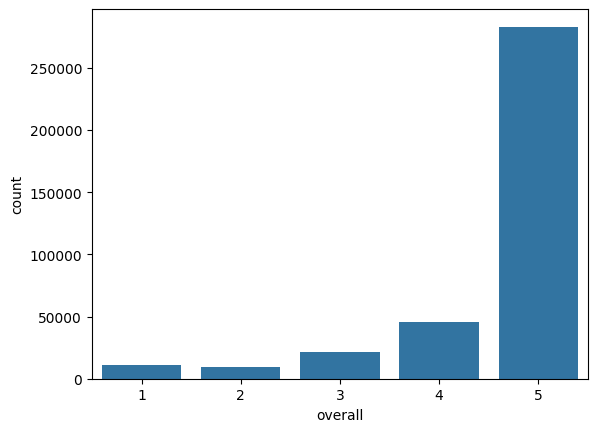

In [49]:
sns.countplot(x="overall", data=train)

In [50]:
from plotly import graph_objs as go

fig = go.Figure(go.Funnelarea(
    labels = [f"{i} Star Reviews" for i in temp["overall"]],
    text = [f"{i} Star" for i in temp["overall"]],
    values = temp.Review,
    title = {"position": "top center", "text": "Funnel-Chart of Overall Rating Distribution"}
    ))
fig.show()

In [51]:
temp = train[train.isnull().any(axis=1)]
temp.style.background_gradient(cmap='Blues')

,overall,Review
26709,5,nan
140678,4,nan
149137,5,nan
161123,5,nan
199465,5,nan
309619,5,nan
328716,5,nan
337056,5,nan


In [52]:
test[test.isnull().any(axis=1)]

,id,Review
6149,6149,NaN
80039,80039,NaN
82924,82924,NaN
107549,107549,NaN


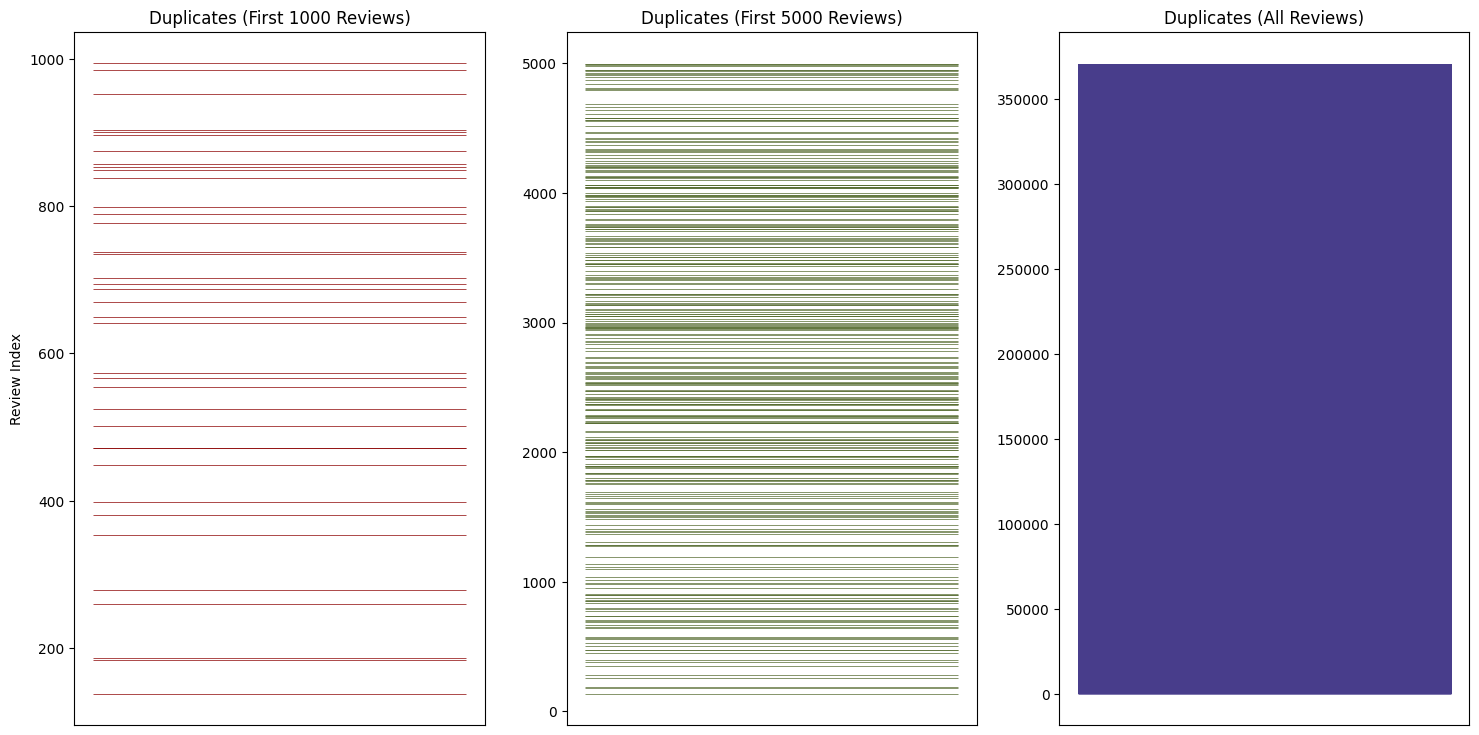

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 9))

ax1.hlines(train[:1000][train.duplicated()].index, xmin=0, xmax=1, colors='darkred', linewidths=0.5)
ax1.set_ylabel('Review Index')
ax1.set_title('Duplicates (First 1000 Reviews)')

ax2.hlines(train[:5000][train.duplicated()].index, xmin=0, xmax=1, colors='darkolivegreen', linewidths=0.5)
ax2.set_title('Duplicates (First 5000 Reviews)')

ax3.hlines(train[:][train.duplicated()].index, xmin=0, xmax=1, colors='darkslateblue', linewidths=0.5)
ax3.set_title('Duplicates (All Reviews)')

for ax in (ax1, ax2, ax3):
    ax.set_xticks([])

In [54]:
train["word_count"] = train["Review"].apply(lambda x: len(str(x).split()))

In [55]:
train.sort_values(by="word_count")

,overall,Review,word_count
173319,5,,0
342413,5,,0
28603,5,,0
203020,5,,0
262501,5,,0
...,...,...,...
305383,5,If you haven't upgraded your Cricut (or have n...,2509
81029,5,"Small update: Nov. 4, 2017\r\nAs noted below,...",3229
321646,5,I bought the Cameo on a whim last x-mas. I had...,3445
253016,4,Expression vs. Slice\r\nThere is no comparison...,3739


In [56]:
train[train['word_count'] > 250]

,overall,Review,word_count
65,5,A few days ago my wife pointed out the fact th...,544
143,1,This is one of those Amazon vendors that conta...,591
171,4,I purchased this palette a while back solely f...,282
267,3,Edit: Looks like they've changed the instructi...,301
273,5,This is a fun set. You can enjoy copic markers...,623
...,...,...,...
370571,5,"I have most of the Distress Ink pads, and I lo...",251
370636,5,"One of my daughters is allergic to wool, so I ...",279
370651,5,"Just so we are all clear, I did NOT get reimbu...",313
370680,5,Excellent machine - comparison to prior Singer...,506


Text(0.5, 1.0, 'Kernel Distribution of Number Of Words')

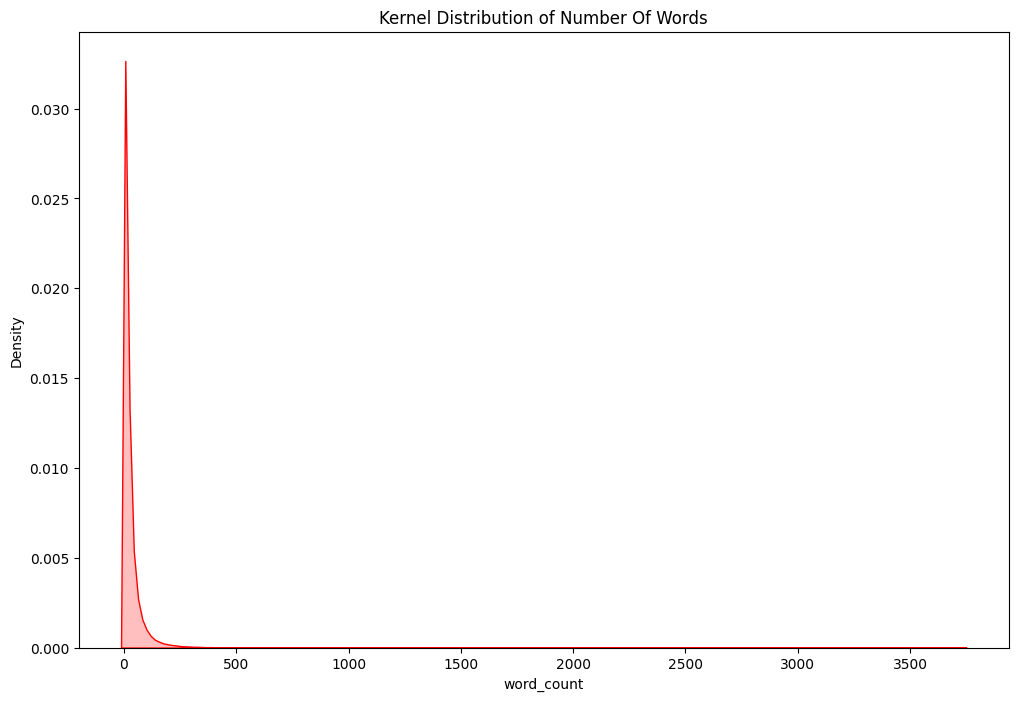

In [57]:
plt.figure(figsize=(12,8))
sns.kdeplot(train['word_count'], shade=True, color="r").set_title('Kernel Distribution of Number Of Words')

In [58]:
train_filtered = train[train["word_count"] <= 50]

Text(0.5, 1.0, 'Kernel Distribution of Number Of Words (Capped to 250 words)')

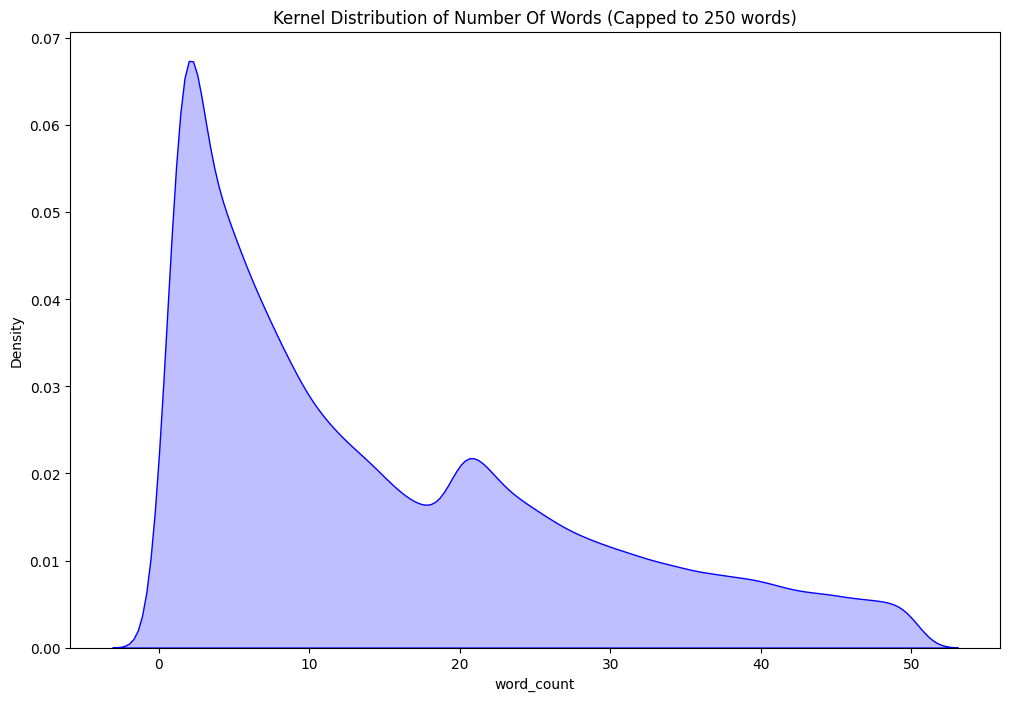

In [59]:
plt.figure(figsize=(12,8))
sns.kdeplot(train_filtered['word_count'], shade=True, color="b").set_title('Kernel Distribution of Number Of Words (Capped to 250 words)')

In [60]:
# Function to generate word cloud
def generate_word_cloud(reviews, sentiment):
    # Concatenate all reviews into a single string
    text = ' '.join(reviews)
    # Generate and display the word cloud
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

# Function to categorize rating
def categorize_rating(rating):
    if rating > 3:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [61]:
# Filter reviews by sentiment
positive_reviews = train[train['overall'] > 3]['Review'].dropna()
neutral_reviews = train[train['overall'] == 3]['Review'].dropna()
negative_reviews = train[train['overall'] < 3]['Review'].dropna()

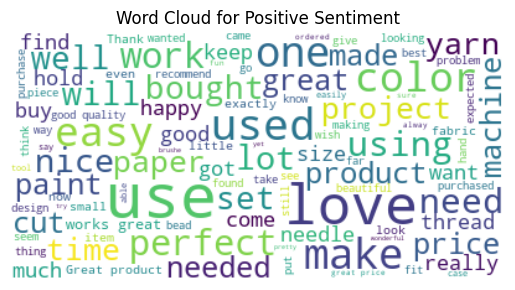

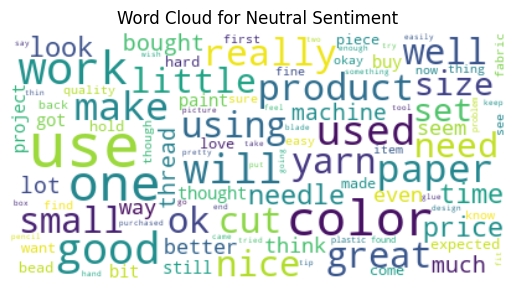

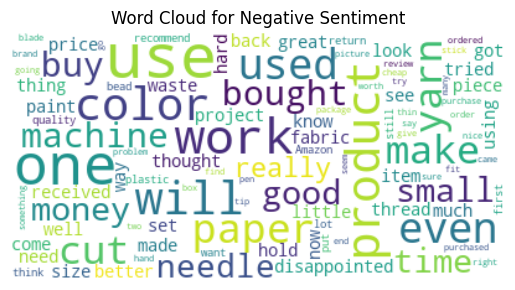

In [62]:
# Generate word clouds for each sentiment
generate_word_cloud(positive_reviews, 'Positive')
generate_word_cloud(neutral_reviews, 'Neutral')
generate_word_cloud(negative_reviews, 'Negative')

## **Part B: Text Processing and Normalization**

**Demonstration of a series of text processing steps commonly used in natural language processing (NLP) tasks. It prepares textual data by cleaning, tokenizing, and normalizing it, which is essential for further analysis or modeling.**

The train and test dataframe was processed where duplicates and NaN values were handled. The text was converted to a standard format, i.e., to lower case, so that different variations of the same word can be treated the same.

In [63]:
def process_dataframe(df, split='train'):
    # Convert text to lowercase
    df['Review'] = df['Review'].str.lower()

    if split=='train':
        # Remove duplicates
        df.drop_duplicates(inplace=True)
        # Reset index after removing duplicates
        df.reset_index(drop=True, inplace=True)

    # Replace NaN characters
    df.fillna('', inplace=True)

In [64]:
process_dataframe(train)

In [65]:
train

,overall,Review,word_count
0,5,i love these glitter pens. they sparkle deligh...,28
1,5,it works well with my machine. i use mostly c...,12
2,5,"this is a great assortment of colors, though t...",60
3,5,just what i was looking for.,6
4,5,i make 400 birds for the hospital each month.,9
...,...,...,...
274428,5,these are the perfect application bottles for ...,66
274429,4,i mainly purchased this for the roll-up pencil...,152
274430,5,i love these dies they make great backgrounds ...,11
274431,5,i love darice embossing folders. darcie's fol...,20


In [66]:
process_dataframe(test,'test')

In [67]:
test

,id,Review
0,0,wonderful asst. of wood carving tools
1,1,pretty lace with 4 way stretch. i was exactly ...
2,2,this is a quick and easy way to start a crazy ...
3,3,"this is my favorite journals, the pages are ve..."
4,4,i bought this for a costume i was making. i wa...
...,...,...
123617,123617,i don't know that i can fully express my adora...
123618,123618,love this works well with machine. good packag...
123619,123619,it is what it is. it works. made of cardboard.
123620,123620,"really cool. it's durable, lightweight and ver..."


In [68]:
nltk.download('wordnet')
# defining stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to C:\Users\Devesh
[nltk_data]     Pansare\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Devesh
[nltk_data]     Pansare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Cleaning text**

The text was cleaned to ensure that special characters like whitespace characters, emoji and punctuations were removed or replaced.

In [69]:
class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.EMOJI_PATTERN = re.compile(
        "(["
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F700-\U0001F77F"  # alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbats
        "])"
        )

    # Clean text
    def clean(self, text):
        text_no_html = re.sub(r'<[^>]+>', ' ', text)
        text_no_links = re.sub(r'http\S+', '', text_no_html)
        text_no_timestamps = re.sub(r'\d{1,2}:\d{2}', '', text_no_links)
        text_no_emoji = re.sub(self.EMOJI_PATTERN, '', text_no_timestamps)
        replace_single_quotes = re.sub(r'&#39;', '\'', text_no_emoji)
        replace_double_quotes = re.sub(r'&quot;', '\"', replace_single_quotes)
        remove_mentions = re.sub(r'@\S*', '', replace_double_quotes)
        remove_whitespace = re.sub(r'\s+', ' ', remove_mentions)
        return remove_whitespace

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['Review'] = X['Review'].apply(self.clean)


In [70]:
TextCleaner().fit_transform(train)

In [71]:
train

,overall,Review,word_count
0,5,i love these glitter pens. they sparkle deligh...,28
1,5,it works well with my machine. i use mostly co...,12
2,5,"this is a great assortment of colors, though t...",60
3,5,just what i was looking for.,6
4,5,i make 400 birds for the hospital each month.,9
...,...,...,...
274428,5,these are the perfect application bottles for ...,66
274429,4,i mainly purchased this for the roll-up pencil...,152
274430,5,i love these dies they make great backgrounds ...,11
274431,5,i love darice embossing folders. darcie's fold...,20


In [72]:
TextCleaner().fit_transform(test)

In [73]:
test

,id,Review
0,0,wonderful asst. of wood carving tools
1,1,pretty lace with 4 way stretch. i was exactly ...
2,2,this is a quick and easy way to start a crazy ...
3,3,"this is my favorite journals, the pages are ve..."
4,4,i bought this for a costume i was making. i wa...
...,...,...
123617,123617,i don't know that i can fully express my adora...
123618,123618,love this works well with machine. good packag...
123619,123619,it is what it is. it works. made of cardboard.
123620,123620,"really cool. it's durable, lightweight and ver..."


In [74]:
import string
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Devesh
[nltk_data]     Pansare\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### **Tokenize text**

Text is broken down into meaningful words for further analysis. Here only tokens with alphabetic characters are retrieved.

In [75]:
class TextTokenizer(BaseEstimator, TransformerMixin):
    # function to tokenize text
    def tokenize_text(self, text):
        tokens = word_tokenize(text)
        # Turn it into tokens, ignoring the punctuation
        return [token for token in tokens if token not in string.punctuation and token.isalpha()]

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self.tokenize_text)

In [76]:
train_reviews_tokenised = TextTokenizer().fit_transform(train['Review'])

In [77]:
train_reviews_tokenised

0         [i, love, these, glitter, pens, they, sparkle,...
1         [it, works, well, with, my, machine, i, use, m...
2         [this, is, a, great, assortment, of, colors, t...
3                        [just, what, i, was, looking, for]
4         [i, make, birds, for, the, hospital, each, month]
                                ...                        
274428    [these, are, the, perfect, application, bottle...
274429    [i, mainly, purchased, this, for, the, pencil,...
274430    [i, love, these, dies, they, make, great, back...
274431    [i, love, darice, embossing, folders, darcie, ...
274432    [i, ordered, these, to, add, to, my, earthy, m...
Name: Review, Length: 274433, dtype: object

In [78]:
test_reviews_tokenised = TextTokenizer().fit_transform(test['Review'])

In [79]:
test_reviews_tokenised

0               [wonderful, asst, of, wood, carving, tools]
1         [pretty, lace, with, way, stretch, i, was, exa...
2         [this, is, a, quick, and, easy, way, to, start...
3         [this, is, my, favorite, journals, the, pages,...
4         [i, bought, this, for, a, costume, i, was, mak...
                                ...                        
123617    [i, do, know, that, i, can, fully, express, my...
123618    [love, this, works, well, with, machine, good,...
123619    [it, is, what, it, is, it, works, made, of, ca...
123620    [really, cool, it, durable, lightweight, and, ...
123621                     [great, hammer, fro, the, price]
Name: Review, Length: 123622, dtype: object

### **Stemming and lemmatization**

#### Stemming

We used NLTK’s Porter algorithm for stemming.

In [80]:
class StemmerNLTK(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stemmer = nltk.PorterStemmer()

    def stemmer_nltk(self,tokens):
        stem_tokens = [self.stemmer.stem(w) for w in tokens]
        # remove stop words with NLTK and convert to lower case
        return [token for token in stem_tokens if not token in stop_words]

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self.stemmer_nltk)

In [81]:
train_reviews_stem = StemmerNLTK().fit_transform(train_reviews_tokenised)

In [82]:
train_reviews_stem

0         [love, glitter, pen, sparkl, delight, page, br...
1                   [work, well, machin, use, mostli, cone]
2         [thi, great, assort, color, though, lot, pink,...
3                                                [wa, look]
4                               [make, bird, hospit, month]
                                ...                        
274428    [perfect, applic, bottl, dispens, powder, glas...
274429    [mainli, purchas, thi, pencil, case, wa, go, g...
274430           [love, die, make, great, background, card]
274431    [love, daric, emboss, folder, darci, folder, v...
274432    [order, add, earthi, marker, previous, order, ...
Name: Review, Length: 274433, dtype: object

Upon applying stemming, we saw that some of the words don’t represent real English words. For example, the sentence, “It works well with my machine.  I use mostly cones on it.”, became, “[work, well, machin, use, mostli, cone]”, where “machin” and “mostly” aren’t actual words.

#### Lemmatization

For a more accurate approach we used NLTK’s WordNet lemmatizer.

In [83]:
class LemmatizeNLTK(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    def lemmatize_nltk(self,tokens):
        lemma_tokens = [self.lemmatizer.lemmatize(w) for w in tokens]
        # remove stop words with NLTK and convert to lower case
        return [token for token in lemma_tokens if not token in stop_words]

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self.lemmatize_nltk)

In [84]:
train_reviews_lemmatized = LemmatizeNLTK().fit_transform(train_reviews_tokenised)

In [85]:
train_reviews_lemmatized

0         [love, glitter, pen, sparkle, delightfully, pa...
1                  [work, well, machine, use, mostly, cone]
2         [great, assortment, color, though, lot, pink, ...
3                                             [wa, looking]
4                             [make, bird, hospital, month]
                                ...                        
274428    [perfect, application, bottle, dispensing, pow...
274429    [mainly, purchased, pencil, case, wa, going, g...
274430            [love, dy, make, great, background, card]
274431    [love, darice, embossing, folder, darcie, fold...
274432    [ordered, add, earthy, marker, previously, ord...
Name: Review, Length: 274433, dtype: object

For example, the sentence, “It works well with my machine.  I use mostly cones on it.”, became, “[work, well, machine, use, mostly, cone]”, all of these represent a word in the English dictionary.

In [86]:
test_reviews_lemmatized = LemmatizeNLTK().fit_transform(test_reviews_tokenised)

In [87]:
test_reviews_lemmatized

0                    [wonderful, asst, wood, carving, tool]
1         [pretty, lace, way, stretch, wa, exactly, orde...
2            [quick, easy, way, start, crazy, quilt, block]
3                         [favorite, journal, page, smooth]
4         [bought, costume, wa, making, wa, going, use, ...
                                ...                        
123617    [know, fully, express, adoration, bag, making,...
123618    [love, work, well, machine, good, packaging, c...
123619                              [work, made, cardboard]
123620    [really, cool, durable, lightweight, functiona...
123621                          [great, hammer, fro, price]
Name: Review, Length: 123622, dtype: object

In [88]:
train_reviews_bigram = train_reviews_lemmatized.apply(lambda x: [' '.join(grams) for grams in nltk.bigrams(x)])
train_reviews_bigram

0         [love glitter, glitter pen, pen sparkle, spark...
1         [work well, well machine, machine use, use mos...
2         [great assortment, assortment color, color tho...
3                                              [wa looking]
4                [make bird, bird hospital, hospital month]
                                ...                        
274428    [perfect application, application bottle, bott...
274429    [mainly purchased, purchased pencil, pencil ca...
274430    [love dy, dy make, make great, great backgroun...
274431    [love darice, darice embossing, embossing fold...
274432    [ordered add, add earthy, earthy marker, marke...
Name: Review, Length: 274433, dtype: object

In [89]:
test_reviews_bigram = test_reviews_lemmatized.apply(lambda x: [' '.join(grams) for grams in nltk.bigrams(x)])
test_reviews_bigram

0         [wonderful asst, asst wood, wood carving, carv...
1         [pretty lace, lace way, way stretch, stretch w...
2         [quick easy, easy way, way start, start crazy,...
3             [favorite journal, journal page, page smooth]
4         [bought costume, costume wa, wa making, making...
                                ...                        
123617    [know fully, fully express, express adoration,...
123618    [love work, work well, well machine, machine g...
123619                          [work made, made cardboard]
123620    [really cool, cool durable, durable lightweigh...
123621                [great hammer, hammer fro, fro price]
Name: Review, Length: 123622, dtype: object

In [90]:
def chunk_dataframe(df : pd.DataFrame, chunk_size : int):
    num_chunks = (len(df) + 999) // chunk_size
    chunks = [chunk for _, chunk in df.groupby(df.index // chunk_size)]
    return chunks
    # print("Number of chunks:", len(chunks))

def extract_polar_words(ngram_review):
    ngram_review_tb = [TextBlob(ngram) for ngram in ngram_review]
    ngrams = [list(blob.words) for blob in ngram_review_tb if blob.sentiment.polarity != 0]
    words = [word for ngram in ngrams for word in ngram]

    words_without_successive_duplicates = []

    for i in range(len(words)):
        # Append the current element to the unique_list if it is different from the next element
        if i == len(words) - 1 or words[i] != words[i + 1]:
            words_without_successive_duplicates.append(words[i])

    return ' '.join(words_without_successive_duplicates)

def preprocess_TextBlob(df : pd.DataFrame, chunk_size : int):
    chunks = chunk_dataframe(df, chunk_size)
    print(f"Number of chunks: {len(chunks)}\n")
    for i, chunk in enumerate(chunks, 1):
        chunks[i-1] = chunk.apply(extract_polar_words)
        print(f"Chunk: {i:003d}    {(i)*1000}/{len(df)}")
    return pd.concat(chunks, axis=0)

In [91]:
train_reviews_bigram_tb = preprocess_TextBlob(train_reviews_bigram, 1000)
train_reviews_bigram_tb

Number of chunks: 275

Chunk: 001    1000/274433
Chunk: 002    2000/274433
Chunk: 003    3000/274433
Chunk: 004    4000/274433
Chunk: 005    5000/274433
Chunk: 006    6000/274433
Chunk: 007    7000/274433
Chunk: 008    8000/274433
Chunk: 009    9000/274433
Chunk: 010    10000/274433
Chunk: 011    11000/274433
Chunk: 012    12000/274433
Chunk: 013    13000/274433
Chunk: 014    14000/274433
Chunk: 015    15000/274433
Chunk: 016    16000/274433
Chunk: 017    17000/274433
Chunk: 018    18000/274433
Chunk: 019    19000/274433
Chunk: 020    20000/274433
Chunk: 021    21000/274433
Chunk: 022    22000/274433
Chunk: 023    23000/274433
Chunk: 024    24000/274433
Chunk: 025    25000/274433
Chunk: 026    26000/274433
Chunk: 027    27000/274433
Chunk: 028    28000/274433
Chunk: 029    29000/274433
Chunk: 030    30000/274433
Chunk: 031    31000/274433
Chunk: 032    32000/274433
Chunk: 033    33000/274433
Chunk: 034    34000/274433
Chunk: 035    35000/274433
Chunk: 036    36000/274433
Chunk: 037    

0         love glitter sparkle delightfully page brillia...
1                                           use mostly cone
2                             great assortment lot pink mix
3                                                          
4                                                          
                                ...                        
274428    perfect application work best application top ...
274429    mainly purchased accessory nice bonus would go...
274430                        love dy make great background
274431    love darice folder reasonable emboss beautiful...
274432    marker previously ordered brighter primary col...
Name: Review, Length: 274433, dtype: object

In [92]:
test_reviews_bigram_tb = preprocess_TextBlob(test_reviews_bigram, 1000)
test_reviews_bigram_tb

Number of chunks: 124

Chunk: 001    1000/123622
Chunk: 002    2000/123622
Chunk: 003    3000/123622
Chunk: 004    4000/123622
Chunk: 005    5000/123622
Chunk: 006    6000/123622
Chunk: 007    7000/123622
Chunk: 008    8000/123622
Chunk: 009    9000/123622
Chunk: 010    10000/123622
Chunk: 011    11000/123622
Chunk: 012    12000/123622
Chunk: 013    13000/123622
Chunk: 014    14000/123622
Chunk: 015    15000/123622
Chunk: 016    16000/123622
Chunk: 017    17000/123622
Chunk: 018    18000/123622
Chunk: 019    19000/123622
Chunk: 020    20000/123622
Chunk: 021    21000/123622
Chunk: 022    22000/123622
Chunk: 023    23000/123622
Chunk: 024    24000/123622
Chunk: 025    25000/123622
Chunk: 026    26000/123622
Chunk: 027    27000/123622
Chunk: 028    28000/123622
Chunk: 029    29000/123622
Chunk: 030    30000/123622
Chunk: 031    31000/123622
Chunk: 032    32000/123622
Chunk: 033    33000/123622
Chunk: 034    34000/123622
Chunk: 035    35000/123622
Chunk: 036    36000/123622
Chunk: 037    

0                                            wonderful asst
1                            pretty lace wa exactly ordered
2                          quick easy way start crazy quilt
3                              favorite journal page smooth
4         use static electricity bond hard clear plastic...
                                ...                        
123617    bag perfect project made mostly black fabric g...
123618                     love work machine good packaging
123619                                                     
123620        really cool durable color vibrant really like
123621                                         great hammer
Name: Review, Length: 123622, dtype: object

## **Part C: Vector space Model and feature representation**
**We continue the text processing and normalization for the train and test dataframes, focusing on vectorization techniques and feature extraction. We perform vecatorization using CountVectorizer, TF-IDF Vectorizer, and Word2Vec Vectorizer. These techniques convert text data into numerical representations that can be used as input for machine learning models.**

#### Balancing train set

In [105]:
def get_balanced_train_set(train_df, method='avg'):
    # Separating out classes
    overall_1 = train_df[train_df["overall"] == 1]
    overall_2 = train_df[train_df["overall"] == 2]
    overall_3 = train_df[train_df["overall"] == 3]
    overall_4 = train_df[train_df["overall"] == 4]
    overall_5 = train_df[train_df["overall"] == 5]

    if type(method)==int:
        class_size = method
    elif method=='min':
        # Minimum size of classes
        class_size = min(len(overall_1), len(overall_2), len(overall_3), len(overall_4), len(overall_5))
    else:
        # Average size of classes
        class_size = int((len(overall_1) + len(overall_2) + len(overall_3) + len(overall_4) + len(overall_5)) / 5)

    # Undersampling
    class_1_balanced = overall_1.sample(n=class_size, replace=True, random_state=42)
    class_2_balanced = overall_2.sample(n=class_size, replace=True, random_state=42)
    class_3_balanced = overall_3.sample(n=class_size, replace=True, random_state=42)
    class_4_balanced = overall_4.sample(n=class_size, replace=True, random_state=42)
    class_5_balanced = overall_5.sample(n=class_size, replace=True, random_state=42)

    # Combining the three separate classes after undersampling
    train_balanced = pd.concat([class_1_balanced, class_2_balanced, class_3_balanced, class_4_balanced, class_5_balanced])

    # Reshuffling the balanced train set
    train_balanced = train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

    # return train_balanced
    return train_balanced["Review"], train_balanced["overall"]

def balanced_train_test_split(*args, **kwargs):
    X_train, X_test, y_train, y_test = train_test_split(*args, **kwargs)
    X_train_balanced, y_train_balanced = get_balanced_train_set(pd.concat([X_train, y_train], axis=1))
    return X_train_balanced, X_test, y_train_balanced, y_test

In [106]:
train_reviews_text = pd.read_csv('data/train_reviews_lemmatized.csv', na_filter=False)
test_reviews_text = pd.read_csv('data/test_reviews_lemmatized.csv', na_filter=False)

X, y = train_reviews_text['Review'], train_reviews_text['overall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [107]:
X_test

192759       recieved today tried brass well sure well used
42195     every sewer crafter must work much better pinning
258145         love shape made pretty card set liked result
264740                 thrilled arrived time guess expected
85850                                          like wa fine
                                ...                        
271631    beautiful add right touch retro card mixed med...
263617    wa asked many time craft show fair clasp keep ...
105754                           love way yarn look awesome
254215    got ta say scoring amazing cutting tool great ...
53260                                                 great
Name: Review, Length: 54887, dtype: object

In [108]:
test_reviews_text

,id,Review
0,0,wonderful asst wood carving tool
1,1,pretty lace way stretch wa exactly ordered
2,2,quick easy way start crazy quilt block
3,3,favorite journal page smooth
4,4,bought costume wa making wa going use static e...
...,...,...
123617,123617,know fully express adoration bag making proper...
123618,123618,love work well machine good packaging came time
123619,123619,work made cardboard
123620,123620,really cool durable lightweight functional ha ...


In [109]:
y_test

192759    5
42195     5
258145    5
264740    3
85850     4
         ..
271631    5
263617    5
105754    5
254215    3
53260     3
Name: overall, Length: 54887, dtype: int64

In [110]:
X_dev, _, y_dev, _ = train_test_split(X, y, test_size=0.80, stratify=y, random_state=42)
X_train_dev, X_test_dev, y_train_dev, y_test_dev = train_test_split(X_dev, y_dev, test_size=0.2, stratify=y_dev, random_state=42)

In [111]:
X_train_dev_balanced, X_test_dev, y_train_dev_balanced, y_test_dev = balanced_train_test_split(X_dev, y_dev, test_size=0.2, stratify=y_dev, random_state=42)

In [112]:
train_reviews_bigram = pd.read_csv('data/train_reviews_bigram_tb.csv', na_filter=False)
test_reviews_bigram = pd.read_csv('data/test_reviews_bigram_tb.csv', na_filter=False)

X, y = train_reviews_bigram['Review'], train_reviews_bigram['overall']
X_train_bigram, X_test_bigram, y_train_bigram, y_test_bigram = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [113]:
test_reviews_bigram

,id,Review
0,0,wonderful asst
1,1,pretty lace wa exactly ordered
2,2,quick easy way start crazy quilt
3,3,favorite journal page smooth
4,4,use static electricity bond hard clear plastic...
...,...,...
123617,123617,bag perfect project made mostly black fabric g...
123618,123618,love work machine good packaging
123619,123619,
123620,123620,really cool durable color vibrant really like


In [114]:
X_bigram_dev, _, y_bigram_dev, _ = train_test_split(X, y, test_size=0.95, stratify=y, random_state=42)
X_train_bigram_dev, X_test_bigram_dev, y_train_bigram_dev, y_test_bigram_dev = train_test_split(X_bigram_dev, y_bigram_dev, test_size=0.2, stratify=y_bigram_dev, random_state=42)

In [115]:
X_train_bigram_dev_balanced, X_test_bigram_dev, y_train_bigram_dev_balanced, y_test_bigram_dev = balanced_train_test_split(X_dev, y_dev, test_size=0.2, stratify=y_bigram_dev, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [54886, 13721]

In [116]:
y_train_dev_balanced.value_counts()

overall
5    8781
2    8781
1    8781
3    8781
4    8781
Name: count, dtype: int64

In [117]:
# Combine X_train and y_train into a single DataFrame
train_df = pd.concat([X_train, y_train], axis=1)
train_df.columns = ['Review', 'overall']

In [118]:
train_df

,Review,overall
148680,wo use glue,5
23915,artist set probably far favorite piece supply ...,5
41079,finally wa able use machine someone experience...,4
65639,took old cartridge craft store waited two week...,5
119660,print production industry loupe outstanding re...,5
...,...,...
176064,great ruler arrived chipped corner send back w...,3
228109,set art color good beginning advanced artist r...,5
183304,super soft using like still learnign technique...,4
188036,nice size cutting quilt block,5


In [119]:
# Balance each class to the average size of all classes
X_train_balanced_avg, y_train_balanced_avg = get_balanced_train_set(train_df)

In [120]:
y_train_balanced_avg.value_counts()

overall
1    43909
2    43909
5    43909
3    43909
4    43909
Name: count, dtype: int64

In [121]:
# Balance each class to the minimum size of all classes
X_train_balanced_min, y_train_balanced_min = get_balanced_train_set(train_df, 'min')

In [122]:
y_train_balanced_min.value_counts()

overall
4    6714
1    6714
2    6714
5    6714
3    6714
Name: count, dtype: int64

In [123]:
# Balance each class to a specific size (20000)
X_train_balanced_20000, y_train_balanced_20000 = get_balanced_train_set(train_df, 20000)

In [124]:
y_train_balanced_20000.value_counts()

overall
4    20000
5    20000
1    20000
3    20000
2    20000
Name: count, dtype: int64

#### Function to plot the top 20 words
https://gghantiwala.medium.com/using-wordclouds-and-n-grams-to-visualise-text-data-e71e96a3f152

In [125]:
def plot_top_20_words(bag_of_words, vec, title):
    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

    common_words = words_freq[:20]
    df1 = pd.DataFrame(common_words, columns = ['ngram' , 'count'])
    df1.groupby('ngram').sum()['count'].sort_values(ascending=False).plot(kind='bar', title=title)

### Bag of words

Here a sparse matrix is created from the frequency of vocabulary words where each row in the matrix is a sentence vector. CountVectorizer was used to implement this representation.

In [126]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)

We found that there were 39090 unique vocabulary words in our train dataset and each sentence vector length is equal to the vocabulary size.

In [127]:
len(cv.vocabulary_.keys())

39090

In [128]:
X_train[0]

'love glitter pen sparkle delightfully page brilliantly coloured even without glitter darker colour bleed thin paper however'

In [129]:
X_train_cv[0].shape

(1, 39090)

In [130]:
# Prints the vocabulary words
sorted(cv.vocabulary_.keys())

['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaa',
 'aaaaaaaaa',
 'aaaaaaaaaa',
 'aaaaaaaaaaa',
 'aaaaaaah',
 'aaaaamazing',
 'aaaand',
 'aaahhhing',
 'aaalways',
 'aaargh',
 'aacute',
 'aadel',
 'aagain',
 'aahhh',
 'aall',
 'aand',
 'aanraku',
 'aare',
 'aaron',
 'aarrgh',
 'aasome',
 'aaugh',
 'aawesome',
 'ab',
 'aba',
 'aback',
 'abalone',
 'abandon',
 'abandoned',
 'abandoning',
 'abbey',
 'abbott',
 'abbreviated',
 'abbreviation',
 'abc',
 'abd',
 'abdomen',
 'abdur',
 'abeating',
 'abeda',
 'abel',
 'aberration',
 'abet',
 'abetter',
 'abide',
 'abiding',
 'abieant',
 'abierto',
 'abigger',
 'ability',
 'abit',
 'abject',
 'abl',
 'able',
 'abloslutely',
 'ablot',
 'ablw',
 'abnormal',
 'abnormality',
 'abnormally',
 'aboard',
 'abomination',
 'aboriginal',
 'abort',
 'aboslutely',
 'abosultely',
 'abot',
 'abother',
 'abou',
 'abound',
 'abounds',
 'abouta',
 'aboutn',
 'aboutr',
 'abouve',
 'abovementioned',
 'abrade',
 'abraded',
 'abrades',
 'abrading',
 'abraise',
 'abrasion',
 

In [131]:
X_test_cv = cv.transform(X_test)

#### Top 20 unigrams using CountVectorizer

Here we see that 'great' is the most frequent word.

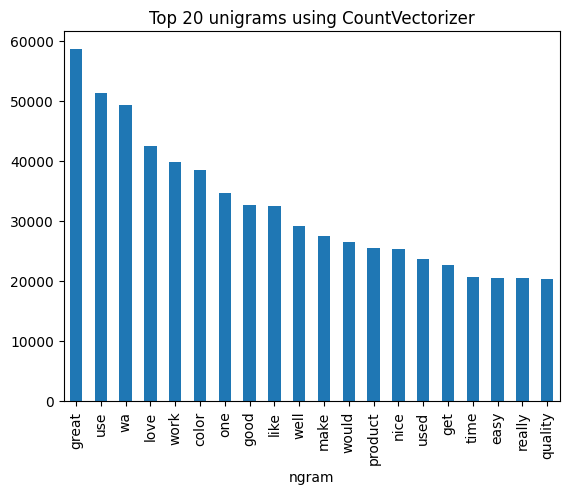

In [132]:
plot_top_20_words(X_train_cv, cv, 'Top 20 unigrams using CountVectorizer')

Above only represents features as single words i,e as unigrams. Bigram representation of the input can be  achieved  by simply changing the default argument (ngram_range) of CountVectorizer.

In [133]:
cv_bigram = CountVectorizer(ngram_range=(2,2))
X_train_cv_bigram = cv_bigram.fit_transform(X_train)

In [134]:
# Prints the vocabulary words
sorted(cv_bigram.vocabulary_.keys())

['aa aaa',
 'aa almost',
 'aa battery',
 'aa pin',
 'aa spline',
 'aa strong',
 'aa tree',
 'aa use',
 'aa wa',
 'aa white',
 'aaa aa',
 'aaa battery',
 'aaa bead',
 'aaa button',
 'aaa grade',
 'aaa opal',
 'aaa portable',
 'aaa purported',
 'aaa quality',
 'aaa real',
 'aaa though',
 'aaa uniform',
 'aaaaaaah honestly',
 'aaaaamazing work',
 'aaaand direction',
 'aaalways artist',
 'aaargh sharpest',
 'aacute better',
 'aacute ctico',
 'aacute pices',
 'aagain thanks',
 'aahhh trepidation',
 'aall set',
 'aand right',
 'aand scrapbooking',
 'aanraku make',
 'aare highest',
 'aaron brother',
 'aasome people',
 'aaugh manual',
 'aawesome perfect',
 'ab ab',
 'ab add',
 'ab allowing',
 'ab bead',
 'ab beautiful',
 'ab bigger',
 'ab brilliant',
 'ab brother',
 'ab coating',
 'ab color',
 'ab coloring',
 'ab crystal',
 'ab effect',
 'ab engraved',
 'ab even',
 'ab facetd',
 'ab filament',
 'ab finish',
 'ab first',
 'ab get',
 'ab gram',
 'ab handle',
 'ab held',
 'ab hold',
 'ab inch',
 

In [135]:
X_test_cv_bigram = cv_bigram.transform(X_test)

#### Top 20 bigrams using CountVectorizer

Here we see that 'work great' is the most frequent word.

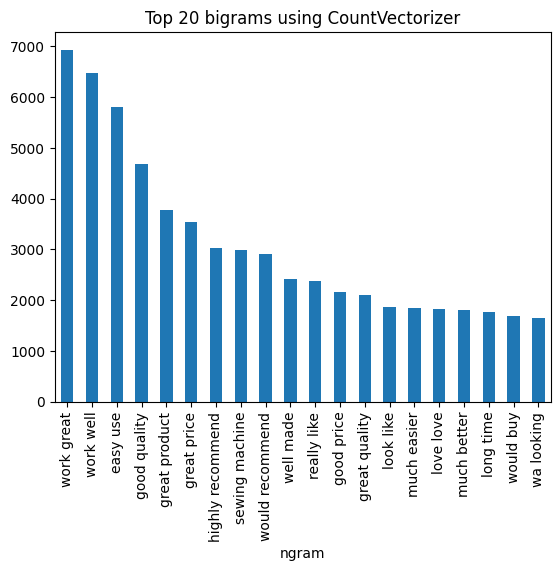

In [136]:
plot_top_20_words(X_train_cv_bigram, cv_bigram, 'Top 20 bigrams using CountVectorizer')

### TF-IDF

Term Frequency–Inverse Document Frequency is another frequency-based method that considers the importance of a word in a document. In TF-IDF, frequent words don’t overcome the less frequent but important words.


In [137]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)

#### Dataframe with sorted TF-IDF scores

Creating a data frame with feature names, i.e. the words, as indices, and sorted TF-IDF scores as a column. This sorts features in the order of importance, most important at the top.

In [138]:
tfidf_scores = pd.DataFrame(X_train_tfidf[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
tfidf_scores.sort_values('TF-IDF', ascending=False)

,TF-IDF
wo,0.677282
glue,0.651243
use,0.342304
aa,0.000000
programing,0.000000
...,...
foreward,0.000000
forewarn,0.000000
forewarned,0.000000
forewarning,0.000000


In [139]:
X_test_tfidf = tfidf.fit_transform(X_test)

According to TF-IDF, the term 'work', represented by 'wo', achieves the highest score, making it the most significant feature. In contrast, numerous words that might have been considered for feature construction in Bag of Words contribute little to no value here, represented by a score of 0. https://neptune.ai/blog/vectorization-techniques-in-nlp-guide

### Word2Vec

We used Gensim library and trained the Word2Vec model on our train dataset. Unlike Bag of Words and TF-IDF, where it ignored semantics completely, Word2Vec was more contextually aware.

In [140]:
class Word2VecVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, vector_size=200, window=5, min_count=5):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.model_w2v = None

    # Vectorize a sentence using the Word2Vec model
    def vectorize(self, sentence):
        words = sentence.split()
        words_vecs = [self.model_w2v.wv[word] for word in words if word in self.model_w2v.wv]
        if len(words_vecs) == 0:
            return np.zeros(self.vector_size)
        words_vecs = np.array(words_vecs)
        return words_vecs.mean(axis=0)

    def fit(self, X, y=None):
        file_path = "word2vec_model.bin"

        if os.path.exists(file_path):
            print(f"The file '{file_path}' exists.")
            # Load the Word2Vec model from the file
            self.model_w2v = Word2Vec.load(file_path)
        else:
            # Train the Word2Vec model
            sentences = [sentence.split() for sentence in X]
            self.model_w2v = Word2Vec(sentences, vector_size=self.vector_size, window=self.window, min_count=self.min_count)
            # Save the model to the file
            self.model_w2v.save(file_path)

        return self

    def transform(self, X):
        return [self.vectorize(sentence) for sentence in X]

In [141]:
w2v_vectorizer = Word2VecVectorizer()
X_train_w2v = w2v_vectorizer.fit_transform(X_train)

In [142]:
# print out the Word2Vec vector for the first review
X_train_w2v[0]

array([ 0.09535453,  0.9901479 ,  0.09309997,  1.1854318 , -0.6394247 ,
        0.02760551, -0.9933305 , -0.13819855, -0.59030104, -0.457822  ,
        0.38290414, -1.5062221 ,  0.05399347,  0.15330617,  0.3994105 ,
       -0.18377554,  0.03094339, -0.42722997,  0.7786427 , -0.02487842,
       -0.5803398 , -0.02323534, -0.12856592,  0.27116212,  1.1094538 ,
        0.24143112, -0.9251998 ,  0.8594277 ,  0.17323188,  0.5585138 ,
       -0.9223792 , -0.16274458, -0.8215523 , -0.3625146 , -0.06633792,
        0.7685663 , -1.2051948 ,  0.20319021, -0.33531845,  0.23219776,
       -0.6374075 ,  0.15867637,  0.33765745,  0.8317712 , -0.6363721 ,
        0.01087487, -0.2995823 ,  0.5638895 , -0.82029957, -0.53664   ,
        0.25841743,  0.5627775 ,  0.8374813 ,  0.3222842 , -0.9215956 ,
       -0.0151245 ,  0.5251099 , -0.05733247,  0.17142081,  0.6602556 ,
        0.42013797,  0.77685165, -0.28610158,  0.83759075,  0.8264372 ,
       -0.4873867 , -0.16236211,  0.0886341 ,  0.20099203, -0.42

In [143]:
X_test_w2v = w2v_vectorizer.transform(X_test)

## **Part D: Model training, selection and hyperparameter tuning and evaluation**

#### **Pipeline Creation**

In [144]:
# Pipeline to create multiple classifier models
def create_pipelines(vectorizer_list:list, classifier_list: list):
    models = []
    for vectorizer in vectorizer_list:
        for classifier in classifier_list:
            models.append(Pipeline([('vect', vectorizer), ('clf', classifier)]))
    return models

#### **Evaluation**

In [145]:
# Displays the classification report
def display_cf_report(y_true, y_pred):
  cf_report = classification_report(y_true, y_pred)
  print("\nClassification Report:\n", cf_report)

In [146]:
def plot_confusion_matrices(model, X_test, y_test, class_labels):
    fig, ax = plt.subplots(figsize=(6, 4))

    ConfusionMatrixDisplay.from_estimator(model,
                                        X_test,
                                        y_test,
                                        ax=ax,
                                        cmap='Blues',
                                        display_labels=class_labels)
    ax.set_title(model.named_steps['clf'].__class__.__name__)
    plt.tight_layout()
    plt.show()

In [147]:
def evaluate_classifiers(model, X_train, y_train, X_test, y_test):
    model_name = model.named_steps['clf'].__class__.__name__
    model.fit(X_train, y_train)

    print(f"Results for {model_name} model:\n")

    print(f"Model: {model}\n")

    y_pred_train = model.predict(X_train)
    score_train = accuracy_score(y_train, y_pred_train)
    print(f"Accuracy on train set: {score_train:0.3f}")

    y_pred_test = model.predict(X_test)
    score_test = accuracy_score(y_test, y_pred_test)
    print(f"Accuracy on test set: {score_test:0.3f}")

    display_cf_report(y_test, y_pred_test)

    class_labels = [1,2,3,4,5]

    plot_confusion_matrices(model, X_test, y_test, class_labels)

    return model


### Comparing Count vectorizer, Tf-idf and Word2Vec

We applied BOW, TF-IDF and Word2Vec with random forest classifier on default parameters to check the performance of each.

In [148]:
vec_compare_list = [Word2VecVectorizer()]

vect_models = create_pipelines(vec_compare_list, [RandomForestClassifier()])

The file 'word2vec_model.bin' exists.
Results for RandomForestClassifier model:

Model: Pipeline(steps=[('vect', Word2VecVectorizer()),
                ('clf', RandomForestClassifier())])

Accuracy on train set: 0.991
Accuracy on test set: 0.741

Classification Report:
               precision    recall  f1-score   support

           1       0.61      0.07      0.13       374
           2       0.17      0.00      0.01       336
           3       0.36      0.05      0.08       727
           4       0.32      0.03      0.06      1457
           5       0.75      0.99      0.85      8084

    accuracy                           0.74     10978
   macro avg       0.44      0.23      0.23     10978
weighted avg       0.65      0.74      0.65     10978



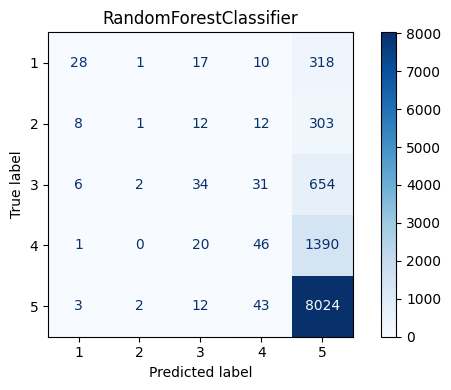

In [149]:
for model in vect_models:
    evaluate_classifiers(model, X_train_dev, y_train_dev, X_test_dev, y_test_dev)

In [150]:
vec_compare_list = [CountVectorizer(), TfidfVectorizer()]

vect_models = create_pipelines(vec_compare_list, [RandomForestClassifier()])

Results for RandomForestClassifier model:

Model: Pipeline(steps=[('vect', CountVectorizer()), ('clf', RandomForestClassifier())])

Accuracy on train set: 0.992
Accuracy on test set: 0.742

Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.18      0.29       374
           2       0.18      0.02      0.04       336
           3       0.38      0.09      0.15       727
           4       0.32      0.04      0.08      1457
           5       0.76      0.98      0.86      8084

    accuracy                           0.74     10978
   macro avg       0.46      0.26      0.28     10978
weighted avg       0.65      0.74      0.66     10978



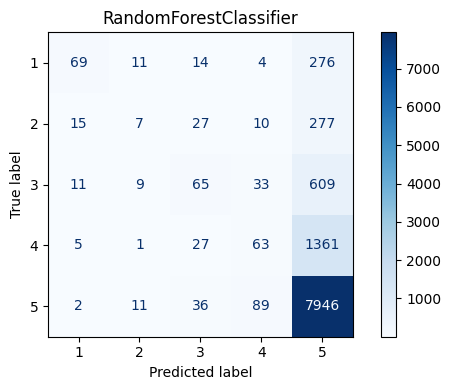

Results for RandomForestClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()), ('clf', RandomForestClassifier())])

Accuracy on train set: 0.992
Accuracy on test set: 0.746

Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.14      0.23       374
           2       0.42      0.03      0.06       336
           3       0.47      0.06      0.11       727
           4       0.42      0.03      0.05      1457
           5       0.75      0.99      0.86      8084

    accuracy                           0.75     10978
   macro avg       0.57      0.25      0.26     10978
weighted avg       0.68      0.75      0.65     10978



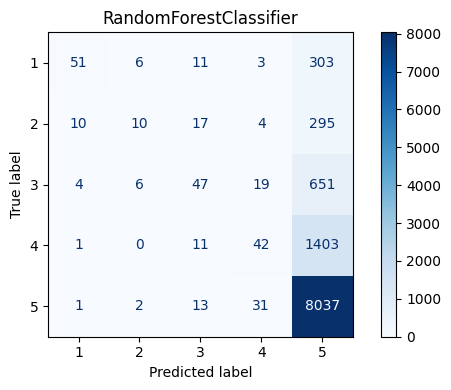

In [151]:
for model in vect_models:
    evaluate_classifiers(model, X_train_dev, y_train_dev, X_test_dev, y_test_dev)

We saw that td-idf performed well compared to others with a train accuracy of 78.8 and test accuracy of 75.6%. This could be because the documents in the dataset were relatively short.

Word2Vec performed poorly with a train accuracy of 98.8% and test accuracy of 73.6%. It is clearly seen that it overfit on the train dataset. This is because the training process requires large amount of data and computational resources.

### Hyperopt function

Hyperopt: https://www.analyticsvidhya.com/blog/2020/09/alternative-hyperparameter-optimization-technique-you-need-to-know-hyperopt/

In [152]:
from hyperopt import fmin, tpe, hp, Trials
from sklearn.model_selection import StratifiedKFold

In [153]:
class HyperoptOptimizer:
    def __init__(self, X, y, vectorizer, classifier, component):
        self.X = X
        self.y = y
        self.vectorizer = vectorizer
        self.classifier = classifier
        self.component = component

    def objective(self, params):
        if self.component == 'vect':
            pipeline = Pipeline([
                ('vect', self.vectorizer(**params)),
                ('clf', self.classifier)
            ])
        elif self.component == 'clf':
            pipeline = Pipeline([
                ('vect', self.vectorizer),
                ('clf', self.classifier(**params))
            ])
        else:
            raise ValueError("Invalid component. Use 'vect' or 'clf'.")

        # Create a stratified k-fold cross-validator
        stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        # cross-validation to avoid overfitting
        score = cross_val_score(pipeline, self.X, self.y, cv=stratified_kfold, scoring="accuracy").mean()

        return -score

    def optimize(self, params_dict, max_evals=30):
        # Define the search space for hyperparameters
        space = params_dict

        # Initialize trials object
        trials = Trials()

        # Run Hyperopt optimization
        best_params = fmin(fn=self.objective,
                           space=space,
                           algo=tpe.suggest,
                           max_evals=max_evals, # Number of iterations for optimization
                           trials=trials
                        )

        return best_params

### Model 1: Random forest classifier with TF-IDF vectorization

In [154]:
rf_dict = {
            'n_estimators' : hp.choice('n_estimators', [50, 100, 1000]),
            'max_depth': hp.choice('max_depth', [5, 10, None]),
            'min_samples_split' : hp.choice('min_samples_split', [2, 5, 10]),
            'min_samples_leaf' : hp.choice('min_samples_leaf', [1,2,5]),
            }

rf_optimizer = HyperoptOptimizer(X_train, y_train, TfidfVectorizer(), RandomForestClassifier, 'clf')
best_params = rf_optimizer.optimize(rf_dict)

print("Best: {}".format(best_params))

100%|██████████| 30/30 [2:26:21<00:00, 292.73s/trial, best loss: -0.7432337638485351]
Best: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 0, 'n_estimators': 0}


Results for RandomForestClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 RandomForestClassifier(min_samples_split=5, n_estimators=50))])

Accuracy on train set: 0.977
Accuracy on test set: 0.748

Classification Report:
               precision    recall  f1-score   support

           1       0.63      0.18      0.28      1870
           2       0.35      0.02      0.04      1678
           3       0.46      0.08      0.13      3635
           4       0.40      0.04      0.08      7286
           5       0.76      0.99      0.86     40418

    accuracy                           0.75     54887
   macro avg       0.52      0.26      0.28     54887
weighted avg       0.67      0.75      0.66     54887



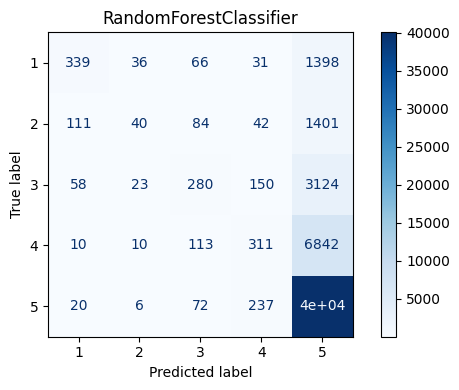

In [155]:
rf_pipeline = Pipeline([
                ('vect', TfidfVectorizer()),
                ('clf', RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50))
            ])

rf_model1 = evaluate_classifiers(rf_pipeline, X_train, y_train, X_test, y_test)

In [156]:
import pickle
pickle.dump(rf_model1, open('rf_model1.pkl', 'wb'))

In [157]:
rf_model1 = pickle.load(open('rf_model1.pkl', 'rb'))
rf_model1

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 RandomForestClassifier(min_samples_split=5, n_estimators=50))])

This shows that the model overfits on the train dataset. To address overfitting and improve the generalization performance of our model, we manually tuned max_depth parameter.

In [158]:
rf_list1 = [RandomForestClassifier(max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50),
            RandomForestClassifier(max_depth=200, min_samples_leaf=1, min_samples_split=5, n_estimators=50),
            RandomForestClassifier(max_depth=250, min_samples_leaf=1, min_samples_split=5, n_estimators=50),
            RandomForestClassifier(max_depth=500, min_samples_leaf=1, min_samples_split=5, n_estimators=50)]
rf_models1 = create_pipelines([TfidfVectorizer()], rf_list1)

Results for RandomForestClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 RandomForestClassifier(max_depth=100, min_samples_split=5,
                                        n_estimators=50))])

Accuracy on train set: 0.801
Accuracy on test set: 0.739

Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.05      0.09      1870
           2       0.67      0.00      0.00      1678
           3       0.62      0.01      0.01      3635
           4       0.51      0.01      0.01      7286
           5       0.74      1.00      0.85     40418

    accuracy                           0.74     54887
   macro avg       0.68      0.21      0.19     54887
weighted avg       0.70      0.74      0.63     54887



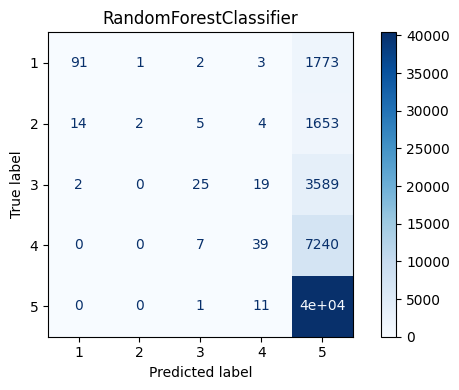

Results for RandomForestClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 RandomForestClassifier(max_depth=200, min_samples_split=5,
                                        n_estimators=50))])

Accuracy on train set: 0.889
Accuracy on test set: 0.745

Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.12      0.20      1870
           2       0.48      0.01      0.01      1678
           3       0.52      0.05      0.09      3635
           4       0.53      0.02      0.04      7286
           5       0.75      1.00      0.86     40418

    accuracy                           0.75     54887
   macro avg       0.60      0.24      0.24     54887
weighted avg       0.69      0.75      0.65     54887



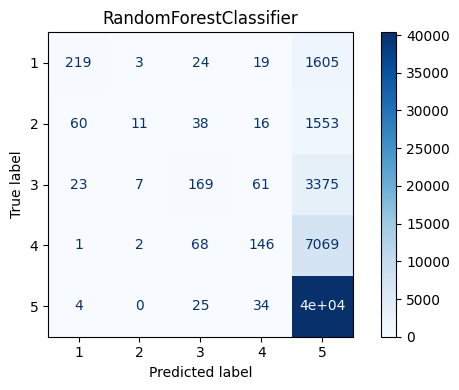

Results for RandomForestClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 RandomForestClassifier(max_depth=250, min_samples_split=5,
                                        n_estimators=50))])

Accuracy on train set: 0.914
Accuracy on test set: 0.747

Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.14      0.23      1870
           2       0.39      0.01      0.02      1678
           3       0.50      0.05      0.09      3635
           4       0.49      0.03      0.05      7286
           5       0.75      1.00      0.86     40418

    accuracy                           0.75     54887
   macro avg       0.57      0.25      0.25     54887
weighted avg       0.69      0.75      0.65     54887



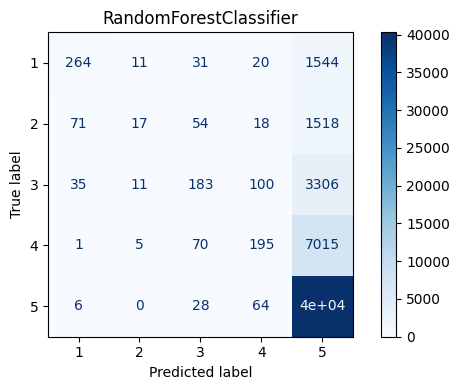

Results for RandomForestClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 RandomForestClassifier(max_depth=500, min_samples_split=5,
                                        n_estimators=50))])

Accuracy on train set: 0.958
Accuracy on test set: 0.748

Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.17      0.27      1870
           2       0.28      0.02      0.04      1678
           3       0.46      0.07      0.12      3635
           4       0.44      0.03      0.06      7286
           5       0.76      0.99      0.86     40418

    accuracy                           0.75     54887
   macro avg       0.52      0.26      0.27     54887
weighted avg       0.68      0.75      0.66     54887



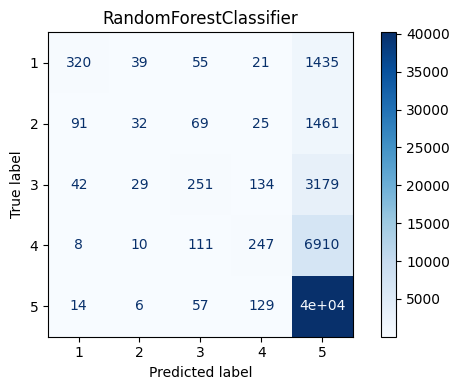

In [159]:
for model in rf_models1:
    evaluate_classifiers(model, X_train, y_train, X_test, y_test)

Results for RandomForestClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 RandomForestClassifier(max_depth=200, min_samples_split=5,
                                        n_estimators=50))])

Accuracy on train set: 0.890
Accuracy on test set: 0.745

Classification Report:
               precision    recall  f1-score   support

           1       0.72      0.11      0.19      1870
           2       0.58      0.01      0.02      1678
           3       0.52      0.05      0.09      3635
           4       0.54      0.02      0.04      7286
           5       0.75      1.00      0.86     40418

    accuracy                           0.75     54887
   macro avg       0.62      0.24      0.24     54887
weighted avg       0.70      0.75      0.65     54887



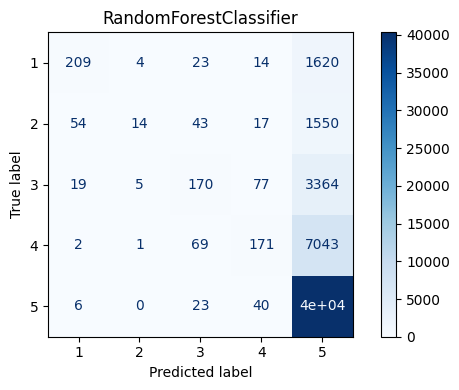

In [160]:
rf_pipeline2 = Pipeline([
                ('vect', TfidfVectorizer()),
                ('clf', RandomForestClassifier(max_depth=200, min_samples_leaf=1, min_samples_split=5, n_estimators=50))
            ])

rf_model2 = evaluate_classifiers(rf_pipeline2, X_train, y_train, X_test, y_test)

In [161]:
import pickle
pickle.dump(rf_model2, open('rf_model2.pkl', 'wb'))

In [162]:
rf_model2 = pickle.load(open('rf_model2.pkl', 'rb'))
rf_model2

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 RandomForestClassifier(max_depth=200, min_samples_split=5,
                                        n_estimators=50))])

The model with max_depth = 200 gave the best results with a train accuracy of 89% and a test accuracy of 74.5%.

### Model 2: Logistic Regression with TF-IDF vectorization

Keeping the default hyperparameters of TF-IDF vectorization using unigrams, we tuned the hyperparameters of logistic regression with the help of hyperopt on the processed and lemmatised train dataset.

In [163]:
lr_dict = {
            'C': hp.choice('C', [0.001, 0.1, 1.0, 10.0]),
            'penalty': hp.choice('penalty', ['l1', 'l2']),
            'class_weight': hp.choice('class_weight', ['balanced',  None]), # help handle class imbalance
            'solver' : hp.choice('solver', ['liblinear', 'saga'])
}

lr_optimizer = HyperoptOptimizer(X_train, y_train, TfidfVectorizer(), LogisticRegression, 'clf')
best_params = lr_optimizer.optimize(lr_dict)

print("Best: {}".format(best_params))

100%|██████████| 30/30 [4:03:16<00:00, 486.57s/trial, best loss: -0.7694287315064081]  
Best: {'C': 2, 'class_weight': 1, 'penalty': 0, 'solver': 1}


Results for LogisticRegression model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(penalty='l1', solver='saga'))])

Accuracy on train set: 0.781
Accuracy on test set: 0.770

Classification Report:
               precision    recall  f1-score   support

           1       0.55      0.45      0.50      1870
           2       0.30      0.07      0.11      1678
           3       0.40      0.23      0.29      3635
           4       0.45      0.15      0.23      7286
           5       0.81      0.97      0.89     40418

    accuracy                           0.77     54887
   macro avg       0.50      0.38      0.40     54887
weighted avg       0.71      0.77      0.72     54887



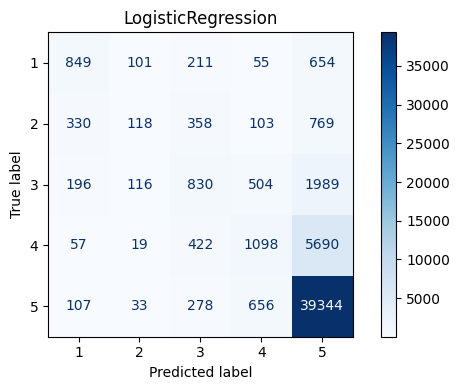

In [164]:
lr_pipeline = Pipeline([
                ('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(C=1.0, class_weight=None, penalty='l1', solver='saga'))
            ])

lr_model1 = evaluate_classifiers(lr_pipeline, X_train, y_train, X_test, y_test)

The model with C=1.0, class_weight=None, penalty='l1', solver='saga' gave the best results with a train accuracy of 78.1% and a test accuracy of 77%.

Results for LogisticRegression model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 LogisticRegression(class_weight='balanced', penalty='l1',
                                    solver='saga'))])

Accuracy on train set: 0.618
Accuracy on test set: 0.591

Classification Report:
               precision    recall  f1-score   support

           1       0.41      0.31      0.35      1870
           2       0.12      0.29      0.17      1678
           3       0.15      0.59      0.24      3635
           4       0.28      0.12      0.16      7286
           5       0.90      0.70      0.79     40418

    accuracy                           0.59     54887
   macro avg       0.37      0.40      0.34     54887
weighted avg       0.72      0.59      0.63     54887



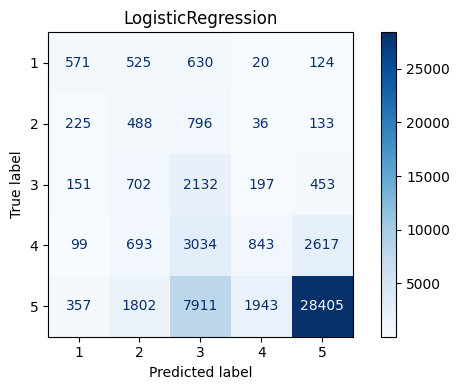

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 LogisticRegression(class_weight='balanced', penalty='l1',
                                    solver='saga'))])

In [165]:
lr_pipeline = Pipeline([
                ('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(C=1.0, class_weight='balanced', penalty='l1', solver='saga'))
            ])

evaluate_classifiers(lr_pipeline, X_train, y_train, X_test, y_test)

#### On balanced dataset

Taking the best hyperparameters, we ran it on a balanced dataset, and we saw that the accuracy on the test dataset reduced drastically.

#### Taking average

Results for LogisticRegression model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(penalty='l1', solver='saga'))])

Accuracy on train set: 0.672
Accuracy on test set: 0.610

Classification Report:
               precision    recall  f1-score   support

           1       0.31      0.56      0.40      1870
           2       0.14      0.31      0.19      1678
           3       0.23      0.37      0.28      3635
           4       0.25      0.40      0.31      7286
           5       0.92      0.68      0.78     40418

    accuracy                           0.61     54887
   macro avg       0.37      0.46      0.39     54887
weighted avg       0.74      0.61      0.66     54887



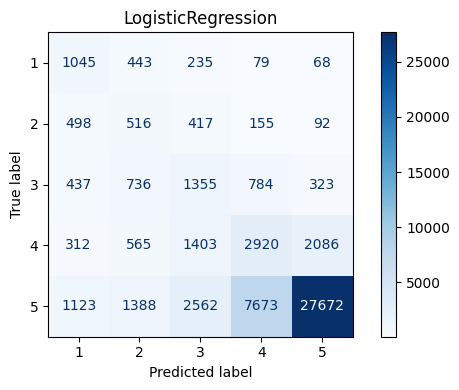

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(penalty='l1', solver='saga'))])

In [166]:
lr_pipeline = Pipeline([
                ('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(C=1.0, class_weight=None, penalty='l1', solver='saga'))
            ])

evaluate_classifiers(lr_pipeline, X_train_balanced_avg, y_train_balanced_avg, X_test, y_test)

#### Taking min

Results for LogisticRegression model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(penalty='l1', solver='saga'))])

Accuracy on train set: 0.600
Accuracy on test set: 0.596

Classification Report:
               precision    recall  f1-score   support

           1       0.30      0.60      0.40      1870
           2       0.13      0.32      0.19      1678
           3       0.22      0.37      0.28      3635
           4       0.25      0.39      0.30      7286
           5       0.91      0.66      0.77     40418

    accuracy                           0.60     54887
   macro avg       0.36      0.47      0.39     54887
weighted avg       0.74      0.60      0.64     54887



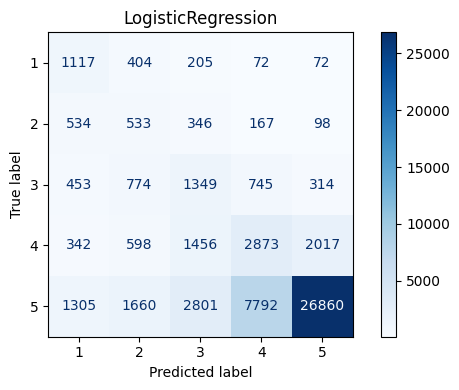

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(penalty='l1', solver='saga'))])

In [167]:
lr_pipeline = Pipeline([
                ('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(C=1.0, class_weight=None, penalty='l1', solver='saga'))
            ])

evaluate_classifiers(lr_pipeline, X_train_balanced_min, y_train_balanced_min, X_test, y_test)

### Taking 20000 reviews from each rating

Results for LogisticRegression model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(penalty='l1', solver='saga'))])

Accuracy on train set: 0.634
Accuracy on test set: 0.610

Classification Report:
               precision    recall  f1-score   support

           1       0.32      0.58      0.41      1870
           2       0.15      0.33      0.21      1678
           3       0.23      0.38      0.28      3635
           4       0.25      0.40      0.31      7286
           5       0.91      0.68      0.78     40418

    accuracy                           0.61     54887
   macro avg       0.37      0.48      0.40     54887
weighted avg       0.74      0.61      0.66     54887



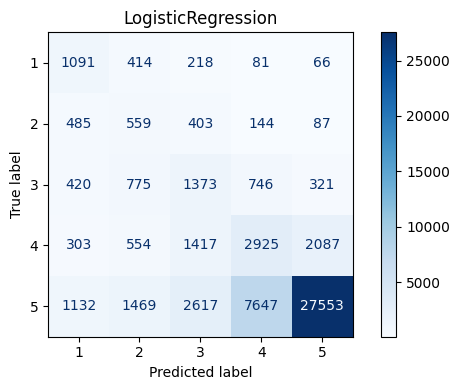

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(penalty='l1', solver='saga'))])

In [168]:
lr_pipeline = Pipeline([
                ('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(C=1.0, class_weight=None, penalty='l1', solver='saga'))
            ])

evaluate_classifiers(lr_pipeline, X_train_balanced_20000, y_train_balanced_20000, X_test, y_test)

### Model 3: Gradient Boosting Classifier with TF-IDF vectorization

Keeping the default hyperparameters of TF-IDF vectorization using unigrams, we tuned the hyperparameters of Gradient Boosting classifier manually on the processed and lemmatised train dataset.

In [169]:
gb_list1 = [GradientBoostingClassifier(learning_rate = 0.01), GradientBoostingClassifier(learning_rate = 0.05), GradientBoostingClassifier(learning_rate = 0.1)]
gb_models1 = create_pipelines([TfidfVectorizer()], gb_list1)

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', GradientBoostingClassifier(learning_rate=0.01))])

Accuracy on train set: 0.738
Accuracy on test set: 0.738

Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.01      0.03       374
           2       0.00      0.00      0.00       336
           3       0.00      0.00      0.00       727
           4       0.92      0.01      0.01      1457
           5       0.74      1.00      0.85      8084

    accuracy                           0.74     10978
   macro avg       0.47      0.20      0.18     10978
weighted avg       0.69      0.74      0.63     10978



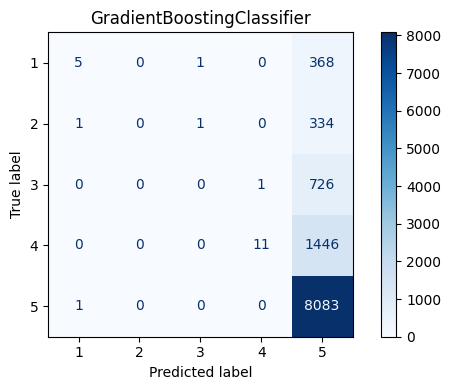

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', GradientBoostingClassifier(learning_rate=0.05))])

Accuracy on train set: 0.755
Accuracy on test set: 0.748

Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.14      0.23       374
           2       0.33      0.01      0.01       336
           3       0.51      0.07      0.12       727
           4       0.57      0.04      0.08      1457
           5       0.75      1.00      0.86      8084

    accuracy                           0.75     10978
   macro avg       0.58      0.25      0.26     10978
weighted avg       0.70      0.75      0.66     10978



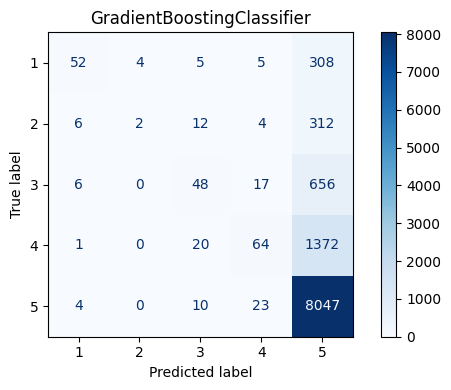

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', GradientBoostingClassifier())])

Accuracy on train set: 0.770
Accuracy on test set: 0.752

Classification Report:
               precision    recall  f1-score   support

           1       0.63      0.18      0.28       374
           2       0.23      0.02      0.04       336
           3       0.49      0.09      0.15       727
           4       0.51      0.07      0.13      1457
           5       0.76      0.99      0.86      8084

    accuracy                           0.75     10978
   macro avg       0.52      0.27      0.29     10978
weighted avg       0.69      0.75      0.67     10978



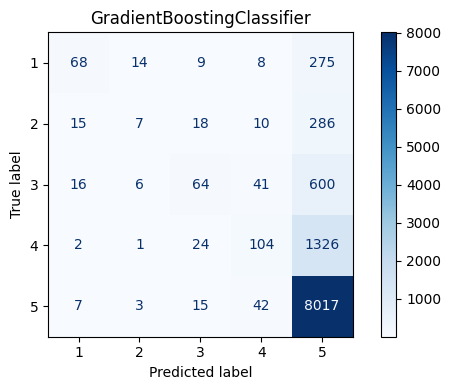

In [170]:
for model in gb_models1:
    evaluate_classifiers(model, X_train_dev, y_train_dev, X_test_dev, y_test_dev)

In [171]:
gb_list2 = [GradientBoostingClassifier(learning_rate = 0.05, subsample = 0.6), GradientBoostingClassifier(learning_rate = 0.05, subsample = 0.8), GradientBoostingClassifier(learning_rate = 0.05, subsample = 1.0)]
gb_models2 = create_pipelines([TfidfVectorizer()], gb_list2)

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            subsample=0.6))])

Accuracy on train set: 0.756
Accuracy on test set: 0.749

Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.14      0.24       374
           2       0.26      0.01      0.03       336
           3       0.54      0.06      0.11       727
           4       0.54      0.05      0.09      1457
           5       0.75      1.00      0.86      8084

    accuracy                           0.75     10978
   macro avg       0.57      0.25      0.27     10978
weighted avg       0.70      0.75      0.66     10978



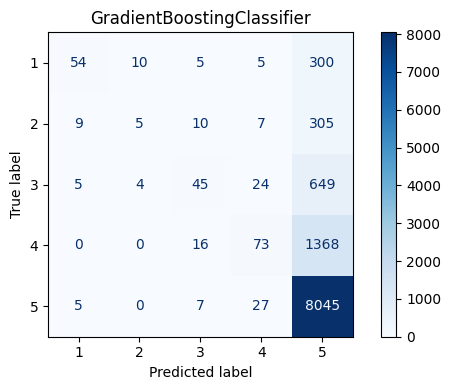

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            subsample=0.8))])

Accuracy on train set: 0.757
Accuracy on test set: 0.749

Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.15      0.25       374
           2       0.31      0.01      0.02       336
           3       0.51      0.07      0.12       727
           4       0.56      0.04      0.08      1457
           5       0.75      1.00      0.86      8084

    accuracy                           0.75     10978
   macro avg       0.57      0.25      0.27     10978
weighted avg       0.70      0.75      0.66     10978



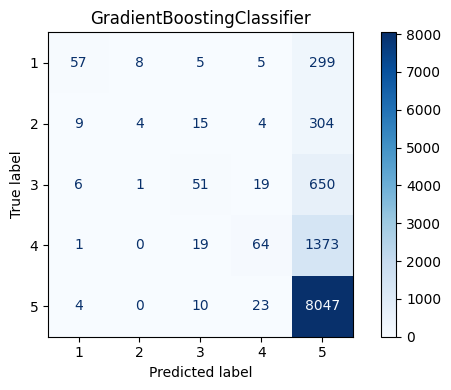

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', GradientBoostingClassifier(learning_rate=0.05))])

Accuracy on train set: 0.755
Accuracy on test set: 0.748

Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.14      0.23       374
           2       0.40      0.01      0.01       336
           3       0.51      0.07      0.12       727
           4       0.57      0.04      0.08      1457
           5       0.75      1.00      0.86      8084

    accuracy                           0.75     10978
   macro avg       0.60      0.25      0.26     10978
weighted avg       0.70      0.75      0.66     10978



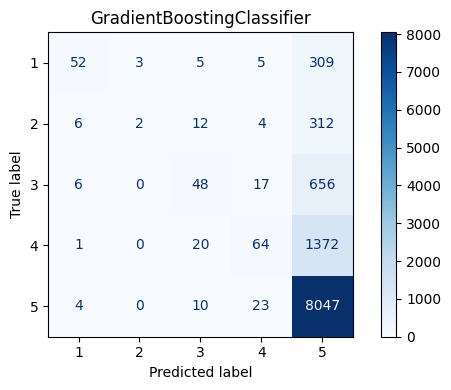

In [172]:
for model in gb_models2:
    evaluate_classifiers(model, X_train_dev, y_train_dev, X_test_dev, y_test_dev)

In [173]:
gb_list3 = [
            GradientBoostingClassifier(learning_rate = 0.05, subsample = 0.6, n_estimators = 50),
            GradientBoostingClassifier(learning_rate = 0.05, subsample = 0.6, n_estimators = 200),
            GradientBoostingClassifier(learning_rate = 0.05, subsample = 0.6, n_estimators = 400),
            GradientBoostingClassifier(learning_rate = 0.05, subsample = 0.6, n_estimators = 500)
            ]
gb_models3 = create_pipelines([TfidfVectorizer()], gb_list3)

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.05, n_estimators=50,
                                            subsample=0.6))])

Accuracy on train set: 0.748
Accuracy on test set: 0.745

Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.10      0.19       374
           2       0.50      0.01      0.01       336
           3       0.52      0.04      0.07       727
           4       0.67      0.03      0.05      1457
           5       0.75      1.00      0.85      8084

    accuracy                           0.75     10978
   macro avg       0.65      0.24      0.24     10978
weighted avg       0.72      0.75      0.65     10978



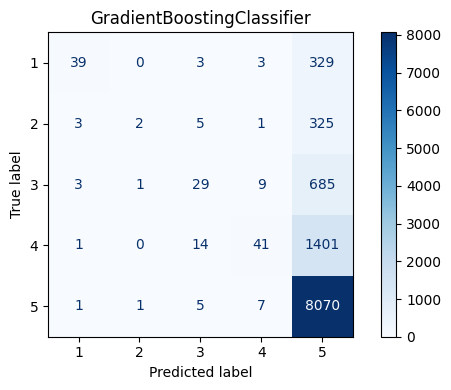

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=200, subsample=0.6))])

Accuracy on train set: 0.767
Accuracy on test set: 0.754

Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.21      0.32       374
           2       0.22      0.01      0.03       336
           3       0.53      0.10      0.17       727
           4       0.50      0.07      0.13      1457
           5       0.76      0.99      0.86      8084

    accuracy                           0.75     10978
   macro avg       0.54      0.28      0.30     10978
weighted avg       0.69      0.75      0.68     10978



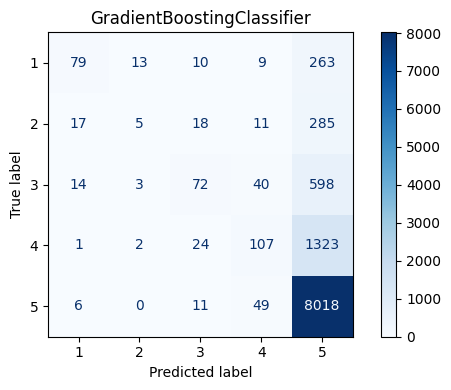

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=400, subsample=0.6))])

Accuracy on train set: 0.784
Accuracy on test set: 0.759

Classification Report:
               precision    recall  f1-score   support

           1       0.58      0.24      0.34       374
           2       0.28      0.04      0.08       336
           3       0.52      0.13      0.21       727
           4       0.47      0.10      0.17      1457
           5       0.78      0.99      0.87      8084

    accuracy                           0.76     10978
   macro avg       0.53      0.30      0.33     10978
weighted avg       0.70      0.76      0.69     10978



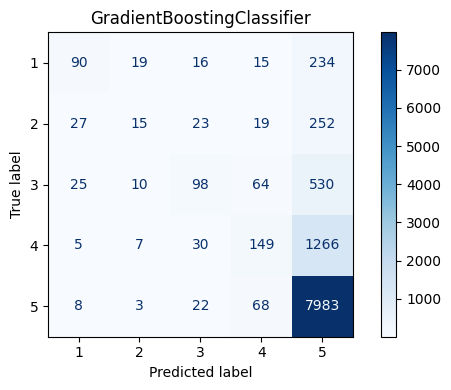

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=500, subsample=0.6))])

Accuracy on train set: 0.789
Accuracy on test set: 0.759

Classification Report:
               precision    recall  f1-score   support

           1       0.57      0.25      0.35       374
           2       0.27      0.05      0.08       336
           3       0.50      0.14      0.21       727
           4       0.44      0.11      0.17      1457
           5       0.78      0.98      0.87      8084

    accuracy                           0.76     10978
   macro avg       0.51      0.31      0.34     10978
weighted avg       0.69      0.76      0.69     10978



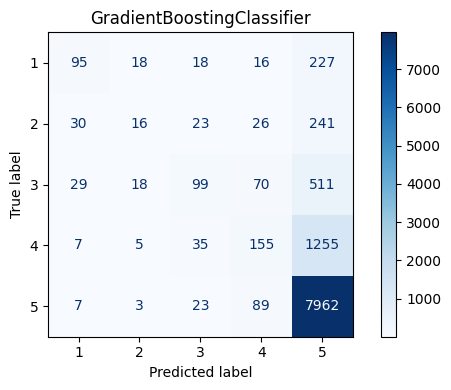

In [174]:
for model in gb_models3:
    evaluate_classifiers(model, X_train_dev, y_train_dev, X_test_dev, y_test_dev)

In [175]:
gb_list4 = [
            GradientBoostingClassifier(learning_rate = 0.05, subsample = 0.6, n_estimators = 400, max_depth = 5),
            GradientBoostingClassifier(learning_rate = 0.05, subsample = 0.6, n_estimators = 400, max_depth = 7),
            GradientBoostingClassifier(learning_rate = 0.05, subsample = 0.6, n_estimators = 200, max_depth = 5),
            GradientBoostingClassifier(learning_rate = 0.05, subsample = 0.6, n_estimators = 200, max_depth = 7)
            ]
gb_models4 = create_pipelines([TfidfVectorizer()], gb_list4)

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=5,
                                            n_estimators=400, subsample=0.6))])

Accuracy on train set: 0.810
Accuracy on test set: 0.760

Classification Report:
               precision    recall  f1-score   support

           1       0.57      0.27      0.36       374
           2       0.27      0.06      0.10       336
           3       0.45      0.14      0.21       727
           4       0.43      0.12      0.19      1457
           5       0.79      0.98      0.87      8084

    accuracy                           0.76     10978
   macro avg       0.50      0.31      0.35     10978
weighted avg       0.69      0.76      0.70     10978



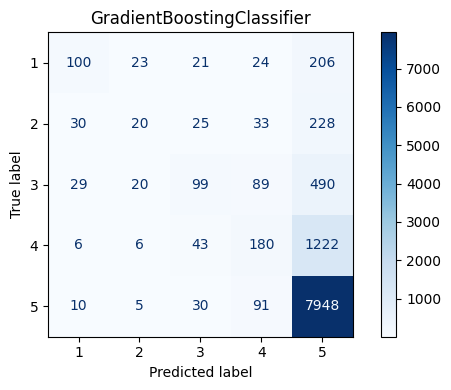

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=7,
                                            n_estimators=400, subsample=0.6))])

Accuracy on train set: 0.837
Accuracy on test set: 0.759

Classification Report:
               precision    recall  f1-score   support

           1       0.58      0.29      0.38       374
           2       0.33      0.07      0.11       336
           3       0.42      0.14      0.21       727
           4       0.42      0.14      0.21      1457
           5       0.79      0.98      0.87      8084

    accuracy                           0.76     10978
   macro avg       0.51      0.32      0.36     10978
weighted avg       0.69      0.76      0.70     10978



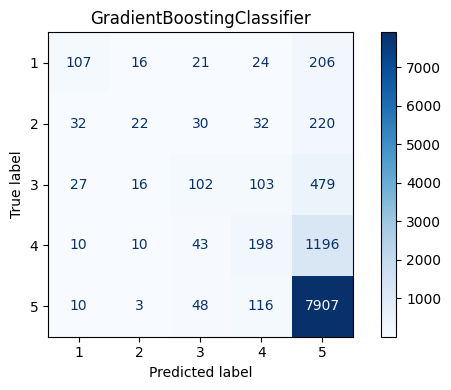

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=5,
                                            n_estimators=200, subsample=0.6))])

Accuracy on train set: 0.788
Accuracy on test set: 0.757

Classification Report:
               precision    recall  f1-score   support

           1       0.61      0.22      0.33       374
           2       0.28      0.03      0.05       336
           3       0.50      0.12      0.19       727
           4       0.47      0.10      0.16      1457
           5       0.77      0.99      0.87      8084

    accuracy                           0.76     10978
   macro avg       0.53      0.29      0.32     10978
weighted avg       0.69      0.76      0.69     10978



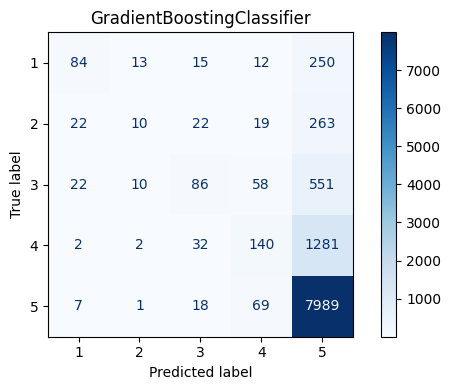

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=7,
                                            n_estimators=200, subsample=0.6))])

Accuracy on train set: 0.810
Accuracy on test set: 0.757

Classification Report:
               precision    recall  f1-score   support

           1       0.55      0.24      0.33       374
           2       0.24      0.04      0.07       336
           3       0.51      0.12      0.20       727
           4       0.41      0.11      0.17      1457
           5       0.78      0.99      0.87      8084

    accuracy                           0.76     10978
   macro avg       0.50      0.30      0.33     10978
weighted avg       0.69      0.76      0.69     10978



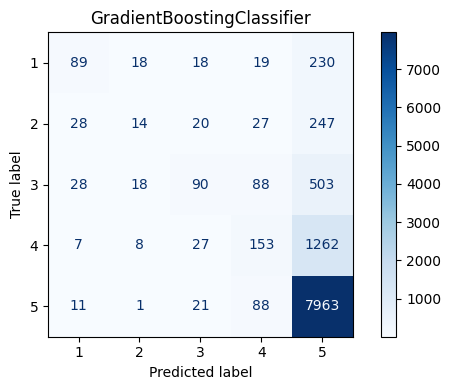

In [176]:
for model in gb_models4:
    evaluate_classifiers(model, X_train_dev, y_train_dev, X_test_dev, y_test_dev)

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=5,
                                            n_estimators=400, subsample=0.6))])

Accuracy on train set: 0.783
Accuracy on test set: 0.763

Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.30      0.40      1870
           2       0.34      0.05      0.09      1678
           3       0.45      0.15      0.22      3635
           4       0.47      0.12      0.19      7286
           5       0.79      0.98      0.87     40418

    accuracy                           0.76     54887
   macro avg       0.53      0.32      0.36     54887
weighted avg       0.70      0.76      0.70     54887



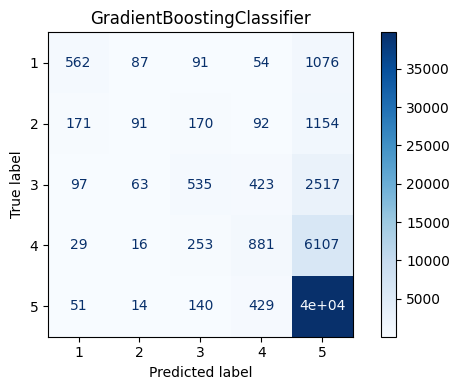

In [177]:
gb_pipeline = Pipeline([
                ('vect', TfidfVectorizer()),
                ('clf', GradientBoostingClassifier(learning_rate = 0.05, subsample = 0.6, n_estimators = 400, max_depth = 5))
            ])

gb_model1 = evaluate_classifiers(gb_pipeline, X_train, y_train, X_test, y_test)

The model with learning_rate = 0.05, subsample = 0.6, n_estimators = 400, max_depth = 5 gave the best results with a train accuracy of 78.3% and a test accuracy of 76.2%.

In [178]:
import pickle
pickle.dump(gb_model1, open('gb_model1.pkl', 'wb'))

In [179]:
gb_model1 = pickle.load(open('gb_model1.pkl', 'rb'))
gb_model1

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=5,
                                            n_estimators=400, subsample=0.6))])

### Model 4: Gradient Boosting Classifier with tuned TF-IDF hyperparameters

We tuned the hyperparameters of TF-IDF vectorizer manually while keeping the default hyperparameters of Gradient Boosting classifier on the processed and lemmatised train dataset.

In [180]:
tfidf_list1 = [
            TfidfVectorizer(ngram_range = (1,1)),
            TfidfVectorizer(ngram_range = (1,2)),
            TfidfVectorizer(ngram_range = (2,2)),
            TfidfVectorizer(ngram_range = (1,3)),
            TfidfVectorizer(ngram_range = (3,3)),
            ]
tfidf_models1 = create_pipelines(tfidf_list1, [GradientBoostingClassifier()])

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', GradientBoostingClassifier())])

Accuracy on train set: 0.770
Accuracy on test set: 0.752

Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.21      0.31       374
           2       0.18      0.01      0.03       336
           3       0.49      0.09      0.16       727
           4       0.50      0.07      0.12      1457
           5       0.76      0.99      0.86      8084

    accuracy                           0.75     10978
   macro avg       0.51      0.27      0.30     10978
weighted avg       0.69      0.75      0.67     10978



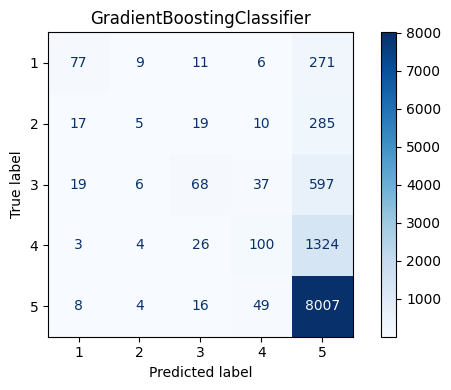

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer(ngram_range=(1, 2))),
                ('clf', GradientBoostingClassifier())])

Accuracy on train set: 0.769
Accuracy on test set: 0.754

Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.23      0.34       374
           2       0.29      0.02      0.04       336
           3       0.50      0.10      0.17       727
           4       0.46      0.08      0.14      1457
           5       0.77      0.99      0.86      8084

    accuracy                           0.75     10978
   macro avg       0.53      0.29      0.31     10978
weighted avg       0.69      0.75      0.68     10978



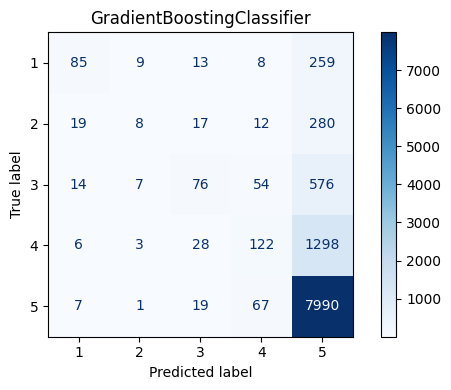

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer(ngram_range=(2, 2))),
                ('clf', GradientBoostingClassifier())])

Accuracy on train set: 0.748
Accuracy on test set: 0.743

Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.12      0.21       374
           2       0.15      0.01      0.01       336
           3       0.40      0.01      0.02       727
           4       0.64      0.03      0.05      1457
           5       0.75      1.00      0.85      8084

    accuracy                           0.74     10978
   macro avg       0.53      0.23      0.23     10978
weighted avg       0.69      0.74      0.64     10978



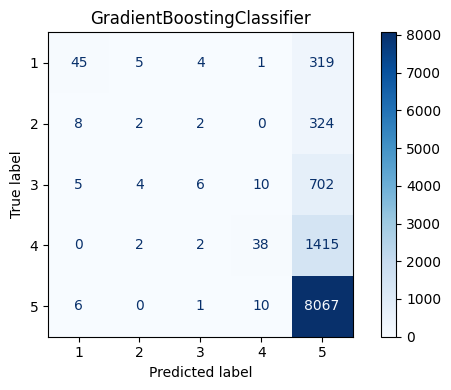

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer(ngram_range=(1, 3))),
                ('clf', GradientBoostingClassifier())])

Accuracy on train set: 0.770
Accuracy on test set: 0.753

Classification Report:
               precision    recall  f1-score   support

           1       0.60      0.23      0.34       374
           2       0.20      0.03      0.05       336
           3       0.41      0.11      0.17       727
           4       0.46      0.11      0.17      1457
           5       0.77      0.98      0.87      8084

    accuracy                           0.75     10978
   macro avg       0.49      0.29      0.32     10978
weighted avg       0.68      0.75      0.68     10978



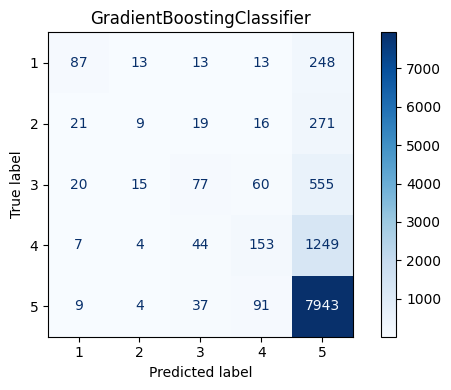

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer(ngram_range=(3, 3))),
                ('clf', GradientBoostingClassifier())])

Accuracy on train set: 0.740
Accuracy on test set: 0.739

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.03      0.06       374
           2       0.12      0.00      0.01       336
           3       0.67      0.01      0.01       727
           4       0.71      0.01      0.02      1457
           5       0.74      1.00      0.85      8084

    accuracy                           0.74     10978
   macro avg       0.65      0.21      0.19     10978
weighted avg       0.72      0.74      0.63     10978



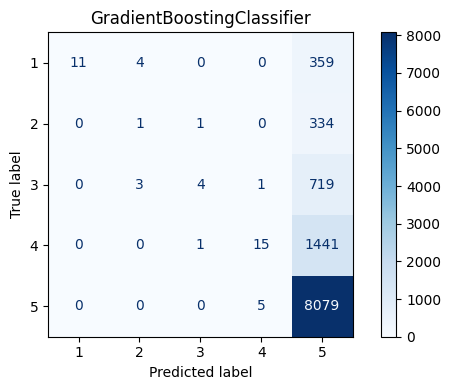

In [181]:
for model in tfidf_models1:
    evaluate_classifiers(model, X_train_dev, y_train_dev, X_test_dev, y_test_dev)

In [182]:
tfidf_list2 = [
            TfidfVectorizer(ngram_range = (1,2), max_df = 0.5),
            TfidfVectorizer(ngram_range = (1,2), max_df = 0.7),
            TfidfVectorizer(ngram_range = (1,2), max_df = 0.9)
            ]
tfidf_models2 = create_pipelines(tfidf_list2, [GradientBoostingClassifier()])

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer(max_df=0.5, ngram_range=(1, 2))),
                ('clf', GradientBoostingClassifier())])

Accuracy on train set: 0.769
Accuracy on test set: 0.755

Classification Report:
               precision    recall  f1-score   support

           1       0.66      0.23      0.34       374
           2       0.33      0.03      0.05       336
           3       0.50      0.10      0.17       727
           4       0.47      0.09      0.15      1457
           5       0.77      0.99      0.86      8084

    accuracy                           0.75     10978
   macro avg       0.55      0.29      0.32     10978
weighted avg       0.69      0.75      0.68     10978



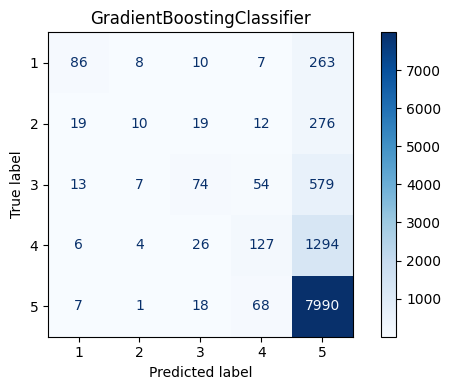

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer(max_df=0.7, ngram_range=(1, 2))),
                ('clf', GradientBoostingClassifier())])

Accuracy on train set: 0.769
Accuracy on test set: 0.755

Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.24      0.35       374
           2       0.34      0.03      0.06       336
           3       0.50      0.10      0.17       727
           4       0.46      0.09      0.14      1457
           5       0.77      0.99      0.86      8084

    accuracy                           0.75     10978
   macro avg       0.55      0.29      0.32     10978
weighted avg       0.69      0.75      0.68     10978



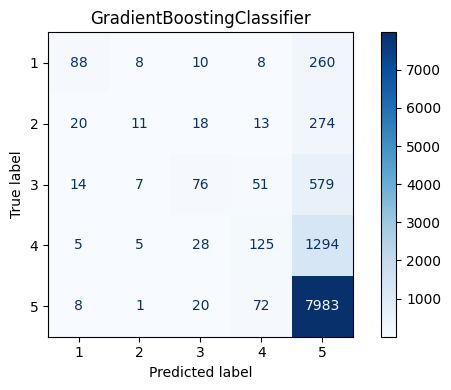

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer(max_df=0.9, ngram_range=(1, 2))),
                ('clf', GradientBoostingClassifier())])

Accuracy on train set: 0.769
Accuracy on test set: 0.755

Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.23      0.34       374
           2       0.32      0.03      0.05       336
           3       0.51      0.10      0.17       727
           4       0.47      0.09      0.14      1457
           5       0.77      0.99      0.86      8084

    accuracy                           0.75     10978
   macro avg       0.54      0.29      0.32     10978
weighted avg       0.69      0.75      0.68     10978



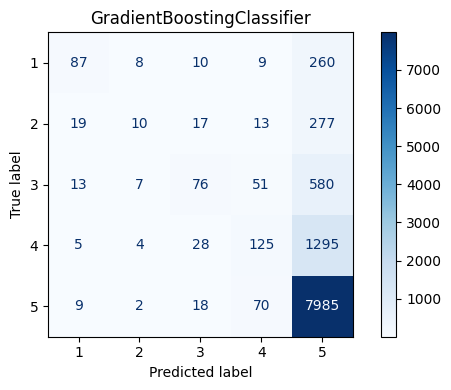

In [183]:
for model in tfidf_models2:
    evaluate_classifiers(model, X_train_dev, y_train_dev, X_test_dev, y_test_dev)

In [184]:
tfidf_list3 = [
            TfidfVectorizer(ngram_range = (1,2), max_df = 0.5, min_df = 2),
            TfidfVectorizer(ngram_range = (1,2), max_df = 0.5, min_df = 3),
            TfidfVectorizer(ngram_range = (1,2), max_df = 0.5, min_df = 5)
            ]
tfidf_models3 = create_pipelines(tfidf_list3, [GradientBoostingClassifier()])

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.5, min_df=2, ngram_range=(1, 2))),
                ('clf', GradientBoostingClassifier())])

Accuracy on train set: 0.769
Accuracy on test set: 0.754

Classification Report:
               precision    recall  f1-score   support

           1       0.69      0.22      0.34       374
           2       0.21      0.03      0.05       336
           3       0.49      0.09      0.16       727
           4       0.49      0.07      0.12      1457
           5       0.77      0.99      0.86      8084

    accuracy                           0.75     10978
   macro avg       0.53      0.28      0.31     10978
weighted avg       0.69      0.75      0.68     10978



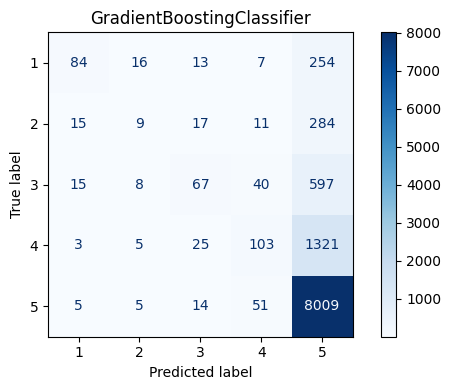

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.5, min_df=3, ngram_range=(1, 2))),
                ('clf', GradientBoostingClassifier())])

Accuracy on train set: 0.769
Accuracy on test set: 0.753

Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.19      0.30       374
           2       0.25      0.02      0.04       336
           3       0.49      0.09      0.15       727
           4       0.52      0.07      0.13      1457
           5       0.76      0.99      0.86      8084

    accuracy                           0.75     10978
   macro avg       0.54      0.27      0.30     10978
weighted avg       0.69      0.75      0.67     10978



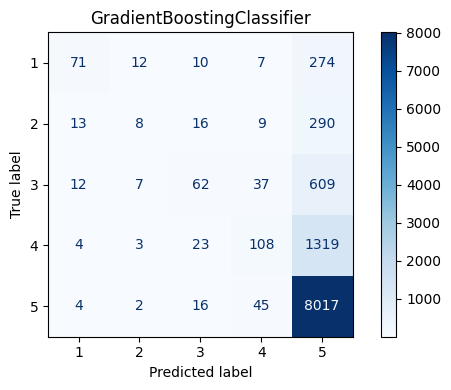

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.5, min_df=5, ngram_range=(1, 2))),
                ('clf', GradientBoostingClassifier())])

Accuracy on train set: 0.770
Accuracy on test set: 0.754

Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.21      0.32       374
           2       0.24      0.03      0.06       336
           3       0.50      0.09      0.15       727
           4       0.51      0.07      0.13      1457
           5       0.77      0.99      0.86      8084

    accuracy                           0.75     10978
   macro avg       0.54      0.28      0.30     10978
weighted avg       0.70      0.75      0.68     10978



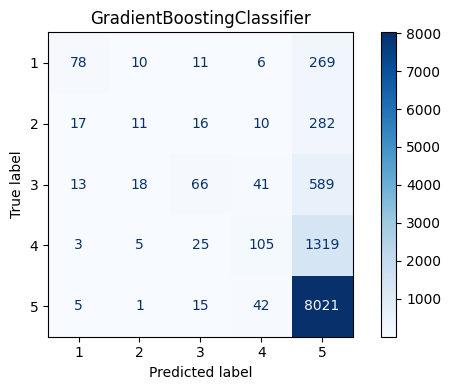

In [185]:
for model in tfidf_models3:
    evaluate_classifiers(model, X_train_dev, y_train_dev, X_test_dev, y_test_dev)

Results for GradientBoostingClassifier model:

Model: Pipeline(steps=[('vect', TfidfVectorizer(max_df=0.5, ngram_range=(1, 2))),
                ('clf', GradientBoostingClassifier())])

Accuracy on train set: 0.761
Accuracy on test set: 0.755

Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.21      0.32      1870
           2       0.43      0.04      0.07      1678
           3       0.49      0.11      0.18      3635
           4       0.51      0.08      0.13      7286
           5       0.77      0.99      0.86     40418

    accuracy                           0.76     54887
   macro avg       0.57      0.28      0.31     54887
weighted avg       0.70      0.76      0.68     54887



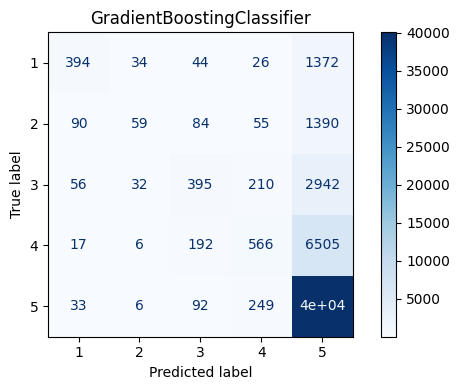

In [186]:
tfidf_pipeline = Pipeline([
                ('vect', TfidfVectorizer(ngram_range = (1,2), max_df = 0.5)),
                ('clf', GradientBoostingClassifier())
            ])

tfidf_model1 = evaluate_classifiers(tfidf_pipeline, X_train, y_train, X_test, y_test)

The tf-idf with hyperparameters ngram_range = (1,2), max_df = 0.5 gave the best results with a train accuracy of 76.1% and a test accuracy of 75.6%.

In [187]:
import pickle
pickle.dump(tfidf_model1, open('tfidf_model1.pkl', 'wb'))

In [188]:
tfidf_model1 = pickle.load(open('tfidf_model1.pkl', 'rb'))
tfidf_model1

Pipeline(steps=[('vect', TfidfVectorizer(max_df=0.5, ngram_range=(1, 2))),
                ('clf', GradientBoostingClassifier())])

## **Part E: Modelling text as a Sequence**

In [189]:
def train_model(model_type, X_train_pad, y_train_adjusted, vocab_size, embedding_dim, max_seq_length, epochs=10, batch_size=64):
    if model_type == "lstm":
        model = Sequential()
        model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=max_seq_length))
        model.add(LSTM(units=30, dropout=0.2, recurrent_dropout=0.2))
        model.add(Dropout(0.2))
        model.add(Dense(5, activation='softmax'))

    elif model_type == "stacked_lstm":
        model = Sequential()
        model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=max_seq_length))
        model.add(LSTM(units=50, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
        model.add(LSTM(units=50, dropout=0.2, recurrent_dropout=0.2))
        model.add(Dense(5, activation='softmax'))

    elif model_type == "cnn":
        model = Sequential()
        model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=max_seq_length))
        model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
        model.add(GlobalMaxPooling1D())
        model.add(Dense(10, activation='relu'))
        model.add(Dense(5, activation='softmax'))

    elif model_type == "bidirectional_lstm":
        model = Sequential()
        model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=max_seq_length))
        model.add(Bidirectional(LSTM(units=30, dropout=0.2, recurrent_dropout=0.2)))
        model.add(Dropout(0.2))
        model.add(Dense(5, activation='softmax'))

    elif model_type == "gru":
        model = Sequential()
        model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=max_seq_length))
        model.add(GRU(units=50, dropout=0.2, recurrent_dropout=0.2))
        model.add(Dense(5, activation='softmax'))

    elif model_type == "bert":
        tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)

        def tokenize_reviews(reviews):
            return tokenizer(reviews, padding=True, truncation=True, max_length=100, return_tensors='tf')

        X_train_tokenized = tokenize_reviews(X_train.tolist())
        X_test_tokenized = tokenize_reviews(X_test.tolist())

        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.summary()

        history = model.fit(X_train_tokenized['input_ids'], y_train_adjusted, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    else:
        raise ValueError("Invalid model type. Choose from: lstm, stacked_lstm, cnn, bidirectional_lstm, gru")

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    if model_type != "bert":
        history = model.fit(X_train_pad, y_train_adjusted, epochs=epochs, batch_size=batch_size, validation_split=0.2)
        return model, history
    else:
        return model, history, X_test_tokenized

In [190]:
# Initialize the keras tokenizer
tokenizer = Tokenizer(num_words=5000) # only consider top 5000 most frequent words in the dataset
tokenizer.fit_on_texts(X_train) #  Updates the internal vocabulary of the tokenizer based on the text data in X_train. The tokenizer creates a mapping from words to integers, with the most frequent word assigned the integer 1 etc.

# Convert text to sequences of integers where each integer represents the index of a word in the tokenizer's vocabulary
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size. We do this because the input to a neural network requires fixed-dimensional input.
# max_seq_length = max([len(seq) for seq in X_train_seq]) # calculates the length of the longest sequence in the training data
max_seq_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length) # pad all sequences to the length of the longest sequence. Shorter sequences are padded with zeros at the beginning
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length) # same as above but for test data

vocab_size = len(tokenizer.word_index) + 1  # length of word_index gives the number of unique words in the vocabulary. In Keras, the padding token (used to pad shorter sequences) is assigned the index 0 by default, and it's not part of the word_index. So, we add 1 to include this padding token in the vocab_size.
embedding_dim = 100  # Dense-vector representation of words where each word is mapped to a vector in a continuous vector space

y_train_adjusted = y_train - 1 # Adjust the target labels to start from 0 instead of 1 (required for sparse_categorical_crossentropy loss)
y_test_adjusted = y_test - 1

In [193]:
def submission(model, name):
    sample=pd.read_csv('data/SampleSubmission.csv') # submission of majority class
    print(sample.head())

    test_reviews_text_seq = tokenizer.texts_to_sequences(test_reviews_text['Review'])
    test_reviews_text_pad = pad_sequences(test_reviews_text_seq, maxlen=max_seq_length) # same as above but for test data

    yy1=model.predict(test_reviews_text_pad)
    predicted_classes = yy1.argmax(axis=1)  # Convert probabilities to class labels
    predicted_classes = predicted_classes + 1
    print("predicted classes shape:",predicted_classes.shape)

    results = pd.DataFrame(np.unique(predicted_classes, return_counts=True))
    print("results: ", results)

    print(predicted_classes)

    sample['overall'] = predicted_classes # save the labels for your model to csv file, you will use this for you Kaggle competition submission
    name = 'Mysubmission_'+name+'.csv'
    sample.to_csv(name, index=False)

    view_submitted=pd.read_csv(name)
    print(view_submitted.describe())
    print(view_submitted['overall'].value_counts())


### **LSTM**

In [194]:
print("LSTM Model: ")
model_lstm , history_lstm = train_model("lstm", X_train_pad, y_train_adjusted, vocab_size, embedding_dim, (100,), epochs=10, batch_size=64)
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_pad, y_test_adjusted)
print(f'Test Accuracy: {accuracy_lstm}')

predictions_lstm = model_lstm.predict(X_test_pad)
predicted_classes_lstm = predictions_lstm.argmax(axis=1)  # Convert probabilities to class labels

submission(model_lstm, "lstm")
print("----------------------------------------")

# grid_result = grid_search( model_type='lstm', X_train=X_train_pad, y_train=y_train_adjusted, vocab_size=vocab_size, embedding_dim=embedding_dim, max_seq_length=max_seq_length)


LSTM Model: 


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 100)       │     3,910,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30)             │        15,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           155 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,926,775 (14.98 MB)

 Trainable params: 3,926,775 (14.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2745/2745 ━━━━━━━━━━━━━━━━━━━━ 183s 66ms/step - accuracy: 0.7435 - loss: 0.7748 - val_accuracy: 0.7683 - val_loss: 0.6396
Epoch 2/10
2745/2745 ━━━━━━━━━━━━━━━━━━━━ 182s 66ms/step - accuracy: 0.7730 - loss: 0.6294 - val_accuracy: 0.7706 - val_loss: 0.6345
Epoch 3/10
2745/2745 ━━━━━━━━━━━━━━━━━━━━ 180s 66ms/step - accuracy: 0.7829 - loss: 0.6012 - val_accuracy: 0.7721 - val_loss: 0.6303
Epoch 4/10
2745/2745 ━━━━━━━━━━━━━━━━━━━━ 182s 66ms/step - accuracy: 0.7861 - loss: 0.5860 - val_accuracy: 0.7726 - val_loss: 0.6341
Epoch 5/10
2745/2745 ━━━━━━━━━━━━━━━━━━━━ 177s 64ms/step - accuracy: 0.7898 - loss: 0.5740 - val_accuracy: 0.7721 - val_loss: 0.6358
Epoch 6/10
2745/2745 ━━━━━━━━━━━━━━━━━━━━ 179s 65ms/step - accuracy: 0.7952 - loss: 0.5588 - val_accuracy: 0.7712 - val_loss: 0.6409
Epoch 7/10
2745/2745 ━━━━━━━━━━━━━━━━━━━━ 173s 63ms/step - accuracy: 0.8016 - loss: 0.5433 - val_accuracy: 0.7684 - val_loss: 0.6489
Epoch 8/10
2745/2745 ━━━━━━━━━━━━━━━━━━━━ 173s 63ms/step - accuracy: 

In [ ]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'batch_size': [64, 128],
    'epochs': [3,5,7,10],
    'units': [30, 50],
    'dropout': [0.2, 0.5],
    'recurrent_dropout': [0.2, 0.5],
    'activation': ['softmax', 'relu']
}

def train_model(X_train, y_train, vocab_size, embedding_dim, max_seq_length, units=30, dropout=0.2, recurrent_dropout=0.2, activation='softmax', batch_size=64, epochs=10):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=(max_seq_length,)))
    model.add(LSTM(units=units, dropout=dropout, recurrent_dropout=recurrent_dropout))
    model.add(Dropout(dropout))
    model.add(Dense(5, activation=activation))  # Assuming 5 classes for classification

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return model, history

best_params = None
best_accuracy = 0.0


for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    units = params['units']
    dropout = params['dropout']
    recurrent_dropout = params['recurrent_dropout']
    activation = params['activation']

    print(f"Training with batch_size={batch_size}, epochs={epochs}, units={units}, dropout={dropout}, recurrent_dropout={recurrent_dropout}, activation={activation}")
    model, history = train_model(X_train_pad, y_train_adjusted, vocab_size, embedding_dim, max_seq_length, units=units, dropout=dropout, recurrent_dropout=recurrent_dropout, activation=activation, batch_size=batch_size, epochs=epochs)

    # Evaluate model
    loss, accuracy = model.evaluate(X_test_pad, y_test_adjusted)
    print(f"Test Accuracy: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)


### **Stacked LSTM**

In [ ]:
print("Stacked LSTM Model: ")
model_stacked_lstm , history_stacked_lstm = train_model("stacked_lstm", X_train_pad, y_train_adjusted, vocab_size, embedding_dim, (max_seq_length,), epochs=10, batch_size=64)
loss_stacked_lstm, accuracy_stacked_lstm = model_stacked_lstm.evaluate(X_test_pad, y_test_adjusted)
print(f'Test Accuracy: {accuracy_stacked_lstm}')

predictions_stacked_lstm = model_stacked_lstm.predict(X_test_pad)
predicted_classes_stacked_lstm = predictions_stacked_lstm.argmax(axis=1)  # Convert probabilities to class labels

submission(model_stacked_lstm, "stacked_lstm")
print("----------------------------------------")


In [ ]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'batch_size': [64, 128],
    'epochs': [3,5,7,10],
    'units': [30, 50],
    'dropout': [0.2, 0.5],
    'recurrent_dropout': [0.2, 0.5],
    'activation': ['softmax', 'relu']
}

def train_model(X_train, y_train, vocab_size, embedding_dim, max_seq_length, units=30, dropout=0.2, recurrent_dropout=0.2, activation='softmax', batch_size=64, epochs=10):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=max_seq_length))
    model.add(LSTM(units=50, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
    model.add(LSTM(units=50, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return model, history

best_params = None
best_accuracy = 0.0


for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    units = params['units']
    dropout = params['dropout']
    recurrent_dropout = params['recurrent_dropout']
    activation = params['activation']

    print(f"Training with batch_size={batch_size}, epochs={epochs}, units={units}, dropout={dropout}, recurrent_dropout={recurrent_dropout}, activation={activation}")
    model, history = train_model("lstm", X_train_pad, y_train_adjusted, vocab_size, embedding_dim, max_seq_length, units=units, dropout=dropout, recurrent_dropout=recurrent_dropout, activation=activation, batch_size=batch_size, epochs=epochs)

    # Evaluate model
    loss, accuracy = model.evaluate(X_test_pad, y_test_adjusted)
    print(f"Test Accuracy: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)


### **CNN**

In [ ]:
print("CNN: ")
model_cnn , history_cnn = train_model("cnn", X_train_pad, y_train_adjusted, vocab_size, embedding_dim, (max_seq_length,), epochs=10, batch_size=64)
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test_pad, y_test_adjusted)
print(f'Test Accuracy: {accuracy_cnn}')

predictions_cnn = model_cnn.predict(X_test_pad)
predicted_classes_cnn = predictions_cnn.argmax(axis=1)  # Convert probabilities to class labels

submission(model_cnn, "cnn")
print("----------------------------------------")

In [ ]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'batch_size': [64, 128],
    'epochs': [3,5,7,10],
    'units': [30, 50],
    'dropout': [0.2, 0.5],
    'recurrent_dropout': [0.2, 0.5],
    'activation': ['softmax', 'relu']
}

def train_model(X_train, y_train, vocab_size, embedding_dim, max_seq_length, units=30, dropout=0.2, recurrent_dropout=0.2, activation='softmax', batch_size=64, epochs=10):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=max_seq_length))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return model, history

best_params = None
best_accuracy = 0.0


for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    units = params['units']
    dropout = params['dropout']
    recurrent_dropout = params['recurrent_dropout']
    activation = params['activation']

    print(f"Training with batch_size={batch_size}, epochs={epochs}, units={units}, dropout={dropout}, recurrent_dropout={recurrent_dropout}, activation={activation}")
    model, history = train_model("lstm", X_train_pad, y_train_adjusted, vocab_size, embedding_dim, max_seq_length, units=units, dropout=dropout, recurrent_dropout=recurrent_dropout, activation=activation, batch_size=batch_size, epochs=epochs)

    # Evaluate model
    loss, accuracy = model.evaluate(X_test_pad, y_test_adjusted)
    print(f"Test Accuracy: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)


### **Bi-Directional LSTM Model**

In [ ]:
print("Bidirectional LSTM Model: ")
model_bidirectional_lstm , history_bidirectional_lstm = train_model("bidirectional_lstm", X_train_pad, y_train_adjusted, vocab_size, embedding_dim, (max_seq_length,), epochs=10, batch_size=64)
loss_bidirectional_lstm, accuracy_bidirectional_lstm = model_bidirectional_lstm.evaluate(X_test_pad, y_test_adjusted)
print(f'Test Accuracy: {accuracy_bidirectional_lstm}')

predictions_bidirectional_lstm = model_bidirectional_lstm.predict(X_test_pad)
predicted_classes_bidirectional_lstm = predictions_bidirectional_lstm.argmax(axis=1)  # Convert probabilities to class labels

submission(model_bidirectional_lstm, "bidirectional_lstm")
print("----------------------------------------")



In [ ]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'batch_size': [64, 128],
    'epochs': [3,5,7,10],
    'units': [30, 50],
    'dropout': [0.2, 0.5],
    'recurrent_dropout': [0.2, 0.5],
    'activation': ['softmax', 'relu']
}

def train_model(X_train, y_train, vocab_size, embedding_dim, max_seq_length, units=30, dropout=0.2, recurrent_dropout=0.2, activation='softmax', batch_size=64, epochs=10):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=max_seq_length))
    model.add(Bidirectional(LSTM(units=30, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return model, history

best_params = None
best_accuracy = 0.0


for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    units = params['units']
    dropout = params['dropout']
    recurrent_dropout = params['recurrent_dropout']
    activation = params['activation']

    print(f"Training with batch_size={batch_size}, epochs={epochs}, units={units}, dropout={dropout}, recurrent_dropout={recurrent_dropout}, activation={activation}")
    model, history = train_model("lstm", X_train_pad, y_train_adjusted, vocab_size, embedding_dim, max_seq_length, units=units, dropout=dropout, recurrent_dropout=recurrent_dropout, activation=activation, batch_size=batch_size, epochs=epochs)

    # Evaluate model
    loss, accuracy = model.evaluate(X_test_pad, y_test_adjusted)
    print(f"Test Accuracy: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)


### **GRU**

In [ ]:
print("GRU Model: ")
model_gru , history_gru = train_model("gru", X_train_pad, y_train_adjusted, vocab_size, embedding_dim, (max_seq_length,), epochs=10, batch_size=64)
loss_gru, accuracy_gru = model_gru.evaluate(X_test_pad, y_test_adjusted)
print(f'Test Accuracy: {accuracy_gru}')

predictions_gru = model_gru.predict(X_test_pad)
predicted_classes_gru = predictions_gru.argmax(axis=1)  # Convert probabilities to class labels

submission(model_gru, "gru")
print("----------------------------------------")



In [ ]:
print("GRU Model: ")
model_gru , history_gru = train_model("gru", X_train_pad, y_train_adjusted, vocab_size, embedding_dim, (max_seq_length,), epochs=10, batch_size=64)
loss_gru, accuracy_gru = model_gru.evaluate(X_test_pad, y_test_adjusted)
print(f'Test Accuracy: {accuracy_gru}')

predictions_gru = model_gru.predict(X_test_pad)
predicted_classes_gru = predictions_gru.argmax(axis=1)  # Convert probabilities to class labels

submission(model_gru, "gru")
print("----------------------------------------")



In [ ]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'batch_size': [64, 128],
    'epochs': [3,5,7,10],
    'units': [30, 50],
    'dropout': [0.2, 0.5],
    'recurrent_dropout': [0.2, 0.5],
    'activation': ['softmax', 'relu']
}

def train_model(X_train, y_train, vocab_size, embedding_dim, max_seq_length, units=30, dropout=0.2, recurrent_dropout=0.2, activation='softmax', batch_size=64, epochs=10):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=max_seq_length))
    model.add(GRU(units=50, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return model, history

best_params = None
best_accuracy = 0.0


for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    units = params['units']
    dropout = params['dropout']
    recurrent_dropout = params['recurrent_dropout']
    activation = params['activation']

    print(f"Training with batch_size={batch_size}, epochs={epochs}, units={units}, dropout={dropout}, recurrent_dropout={recurrent_dropout}, activation={activation}")
    model, history = train_model("lstm", X_train_pad, y_train_adjusted, vocab_size, embedding_dim, max_seq_length, units=units, dropout=dropout, recurrent_dropout=recurrent_dropout, activation=activation, batch_size=batch_size, epochs=epochs)

    # Evaluate model
    loss, accuracy = model.evaluate(X_test_pad, y_test_adjusted)
    print(f"Test Accuracy: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)


In [ ]:
# print("BERT Model: ")
# model_bert, history_bert, X_test_tokenized = train_model("bert", X_train_pad, y_train_adjusted, vocab_size, embedding_dim, max_seq_length, epochs=10, batch_size=64)
# loss_bert, accuracy_bert = model_bert.evaluate(X_test_tokenized['input_ids'], y_test_adjusted)
# print(f'Test Accuracy: {accuracy_bert}')

# submission(model_bert, "bert")
# print("----------------------------------------")

### **Submission**

In [ ]:
sample=pd.read_csv('SampleSubmission.csv') # submission of majority class

In [ ]:
sample.head()

**Submission 1**

In [ ]:
test_reviews_text_seq = tokenizer.texts_to_sequences(test_reviews_text)
test_reviews_text_pad = pad_sequences(test_reviews_text_seq, maxlen=max_seq_length) # same as above but for test data

In [ ]:
yy1=model_gru.predict(test_reviews_text_pad)
predicted_classes = yy1.argmax(axis=1)  # Convert probabilities to class labels

In [ ]:
predicted_classes = predicted_classes + 1
predicted_classes

In [ ]:
predicted_classes.shape

In [ ]:
results = pd.DataFrame(np.unique(predicted_classes, return_counts=True))

In [ ]:
results

In [ ]:
sample['overall'] = predicted_classes # save the labels for your model to csv file, you will use this for you Kaggle competition submission

sample.to_csv('Mysubmission_gru.csv', index=False)

In [ ]:
view_submitted=pd.read_csv('Mysubmission_gru.csv')

In [ ]:
view_submitted.describe()

In [ ]:
view_submitted['overall'].value_counts()

# **Part F: Topic Modelling of high and low ratings**

In [199]:
# Preprocess the text
train['Review'] = train['Review'].str.lower()
train['Review'] = train['Review'].str.replace('[^\w\s]', '')
# Fill missing values with an empty string
train['Review'] = train['Review'].fillna('')
train.loc[0]

<>:3: SyntaxWarning:

invalid escape sequence '\w'

<>:3: SyntaxWarning:

invalid escape sequence '\w'

C:\Users\Devesh Pansare\AppData\Local\Temp\ipykernel_29912\2433077932.py:3: SyntaxWarning:

invalid escape sequence '\w'



overall                                                       5
Review        i love these glitter pens. they sparkle deligh...
word_count                                                   28
Name: 0, dtype: object

In [200]:
# Function to perform topic modeling and print results
def analyze_reviews(reviews, n_topics, n_top_words):
    vectorizer = CountVectorizer(max_df=.15, stop_words='english', max_features=10000)
    X = vectorizer.fit_transform(reviews)
    lda = LatentDirichletAllocation(n_components=n_topics, learning_method="batch", max_iter=25, random_state=0)
    lda.fit(X)
    feature_names = np.array(vectorizer.get_feature_names_out())
    sentiment_pipeline = pipeline("sentiment-analysis")

    negative = 0
    positive = 0
    # Sentiment Analysis with BERT
    for topic_idx, topic in enumerate(lda.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        top_words_str = " ".join(top_words)
        sentiment = sentiment_pipeline(top_words_str)[0]
        print(f"Topic {topic_idx}: {top_words_str} (Sentiment: {sentiment['label']})")
        if (sentiment['label'] == 'NEGATIVE'):
            negative+=1
        else:
            positive+=1
    print("\n", "Out of the top 20 topics, there are",  positive, "positive topics and", negative, "negative topics.")

    topic_assignments = lda.transform(X).argsort(axis=1)[:, -2:] # Assign top 2 topics to each review
    return topic_assignments, lda, feature_names, X, vectorizer

# Function to find common topics
def find_common_topics(feature_names_one, lda_one, feature_names_five, lda_five, n_top_words):
    common_topics = []
    for topic_idx_one, topic_one in enumerate(lda_one.components_):
        top_words_one = {feature_names_one[i] for i in topic_one.argsort()[:-n_top_words - 1:-1]}
        for topic_idx_five, topic_five in enumerate(lda_five.components_):
            top_words_five = {feature_names_five[i] for i in topic_five.argsort()[:-n_top_words - 1:-1]}
            common_words = top_words_one.intersection(top_words_five)
            if common_words:
                common_topics.append((topic_idx_one, topic_idx_five, common_words))
    return common_topics

## **Initial Analysis**

## **Sentiment Analysis over 20 topics over the whole dataset**

In [201]:
topic_assignments, lda, feature_names, X, vectorizer = analyze_reviews(train['Review'], n_topics=20, n_top_words=10)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Topic 0: product money did worth received review didn reviews like disappointed (Sentiment: NEGATIVE)
Topic 1: fabric used stuff leather make material iron quilt dye worked (Sentiment: NEGATIVE)
Topic 2: good quality price product nice excellent fast arrived thank buy (Sentiment: POSITIVE)
Topic 3: cricut instructions design vinyl designs machine silhouette need make just (Sentiment: NEGATIVE)
Topic 4: ve used just time bought don haven years buy far (Sentiment: NEGATIVE)
Topic 5: just needed size perfect worked expected exactly works project work (Sentiment: POSITIVE)
Topic 6: thread embroidery bobbins machine threads bobbin hoop spool spools works (Sentiment: POSITIVE)
Topic 7: box case bag plastic small fit store nice storage set (Sentiment: NEGATIVE)
Topic 8: colors color pencils pens markers set like nice white bright (Sentiment: POSITIVE)
Topic 9: cut cutting scissors sharp mat blade blades cutter fabric cuts (Sentiment: NEGATIVE)
Topic 10: cards card die dies punch cut make embo

**Reviews and their assigned topics**

In [202]:
reviews_df = pd.DataFrame({'Review': train['Review'], 'Assigned_Topics': list(topic_assignments)})

# Display the DataFrame with the top 2 topics for each review
print("\n Reviews with Assigned Topics:")
print(reviews_df)


 Reviews with Assigned Topics:
                                                   Review Assigned_Topics
0       i love these glitter pens. they sparkle deligh...         [13, 8]
1       it works well with my machine. i use mostly co...         [18, 6]
2       this is a great assortment of colors, though t...          [8, 4]
3                            just what i was looking for.         [11, 5]
4           i make 400 birds for the hospital each month.        [14, 10]
...                                                   ...             ...
274428  these are the perfect application bottles for ...         [8, 17]
274429  i mainly purchased this for the roll-up pencil...          [8, 7]
274430  i love these dies they make great backgrounds ...        [11, 10]
274431  i love darice embossing folders. darcie's fold...         [2, 10]
274432  i ordered these to add to my earthy markers th...         [11, 8]

[274433 rows x 2 columns]


**Bar Chart displaying the frequency of each topic in the whole dataset**

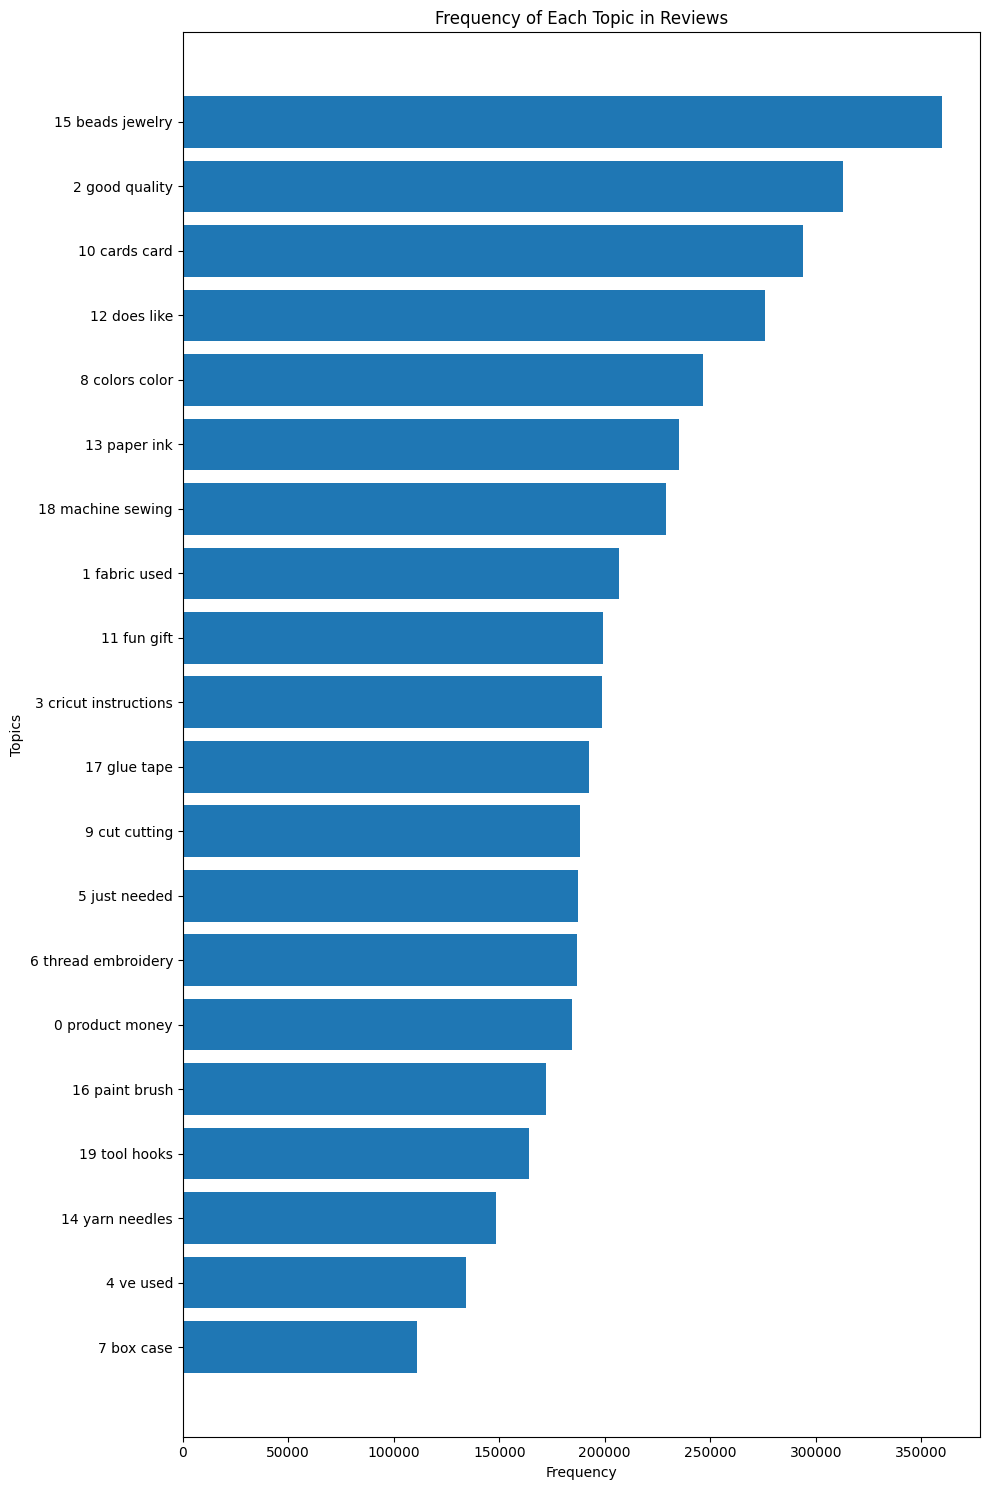

In [203]:
topic_word_distributions = lda.components_
# The number of topics
n_topics = lda.components_.shape[0]

# Sum across the columns to get the total counts for each topic
topic_frequencies = np.sum(topic_word_distributions, axis=1)

# Sort topics by frequency
sorted_topics = np.argsort(topic_frequencies)[::-1]

# Now we will create the labels for the topics with the top 2 words
topic_labels = []
for topic_idx in sorted_topics:
    top_words = [feature_names[i] for i in topic_word_distributions[topic_idx].argsort()[:-3:-1]]
    label = f'{topic_idx} ' + ' '.join(top_words)
    topic_labels.append(label)

# Plotting the bar chart
plt.figure(figsize=(10, 15))
plt.barh(range(n_topics), topic_frequencies[sorted_topics])
plt.yticks(range(n_topics), [topic_labels[topic_idx] for topic_idx in sorted_topics])
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.xlabel('Frequency')
plt.ylabel('Topics')
plt.title('Frequency of Each Topic in Reviews')
plt.tight_layout()
plt.show()

**Visualization using pyLDAavis**

In [204]:
from __future__ import print_function
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

In [205]:
pyLDAvis.lda_model.prepare(lda, X,vectorizer) # visualization for 20 topics

c:\Users\Devesh Pansare\miniconda3\envs\py312\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning:

ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead

c:\Users\Devesh Pansare\miniconda3\envs\py312\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning:

ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead

c:\Users\Devesh Pansare\miniconda3\envs\py312\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning:

ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead

c:\Users\Devesh Pansare\miniconda3\envs\py312\Lib\site-packages\joblib\_utils.py:39: DeprecationWarning:

Attribute n is deprecated and will be removed in Python 3.14; use value instead

c:\Users\Devesh Pansare\miniconda3\envs\py312\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning:

ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead

c:\Users\Devesh Pansare\miniconda3\envs\py312\Lib\sit

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
12    -0.070161 -0.167447       1        1  8.538328
4     -0.216836 -0.043934       2        1  7.370188
8      0.058384  0.078992       3        1  6.877452
0     -0.302779  0.035576       4        1  6.570763
16     0.029398  0.007147       5        1  5.605727
2     -0.107208  0.332533       6        1  5.465080
7     -0.071156 -0.006111       7        1  5.436463
18    -0.036924 -0.143362       8        1  4.958177
14     0.084104 -0.041808       9        1  4.716215
10     0.186798  0.054838      10        1  4.684958
17     0.064520 -0.035586      11        1  4.498076
3     -0.119722 -0.084866      12        1  4.483447
11     0.037458  0.121181      13        1  4.477785
15     0.117294  0.087964      14        1  4.402055
19     0.137610 -0.065236      15        1  4.373569
5     -0.011805  0.126505      16        1  4.000313
13     0.128486  0.032762      17        1  3.937849
9      0.031500 -0.090089      18        1  3.584996
1      0.023375 -0.122090      19        1  3.276082
6      0.037664 -0.076970      20        1  2.742478, topic_info=         Term          Freq         Total Category  logprob  loglift
6158    paper  23268.000000  23268.000000  Default  30.0000  30.0000
3895     good  39087.000000  39087.000000  Default  29.0000  29.0000
6843  quality  24227.000000  24227.000000  Default  28.0000  28.0000
6709  product  26732.000000  26732.000000  Default  27.0000  27.0000
5267  machine  21039.000000  21039.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
5770     need    667.254662  15437.975868  Topic20  -5.1555   0.4549
5078     like    742.568243  40233.618001  Topic20  -5.0485  -0.3960
9023     time    652.136701  21866.502848  Topic20  -5.1784   0.0839
9445    using    631.945638  20467.670364  Topic20  -5.2098   0.1185
6285  perfect    628.185759  20542.088497  Topic20  -5.2158   0.1089

[1412 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
131       2  0.960432        4423
133      18  0.991712        45mm
143       9  0.008869         4x4
143      12  0.048781         4x4
143      20  0.940148         4x4
...     ...       ...         ...
9986      7  0.953230         zip
9986     15  0.021421         zip
9986     18  0.021421         zip
9987      7  0.980863      ziploc
9993      6  0.956600  zipperstop

[4615 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 5, 9, 1, 17, 3, 8, 19, 15, 11, 18, 4, 12, 16, 20, 6, 14, 10, 2, 7])

## **Low-Rated Reviews**

**Sentiment Analysis over the top 20 topics**

In [206]:
# Analyze one-star reviews
one_star_reviews = train[train['overall'] == 1]['Review']
one_star_topic_assignments, lda_one_star, feature_names_one_star, X, vectorizer = analyze_reviews(one_star_reviews, n_topics=20, n_top_words=10)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Topic 0: scissors hooks hook pair received disappointed just like time fabric (Sentiment: NEGATIVE)
Topic 1: cut paper punch cutting die mat dies just tried card (Sentiment: NEGATIVE)
Topic 2: small description size tiny product box disappointed bottle expected says (Sentiment: NEGATIVE)
Topic 3: money waste work don time doesn product just does did (Sentiment: NEGATIVE)
Topic 4: yarn skein clay skeins ball soft really heart work bought (Sentiment: POSITIVE)
Topic 5: machine sewing thread bobbin work did brother singer fit needle (Sentiment: NEGATIVE)
Topic 6: beads like picture cheap look received colors plastic looks quality (Sentiment: NEGATIVE)
Topic 7: easily work thing break just pressure cotton tried didn small (Sentiment: NEGATIVE)
Topic 8: thread breaks spools spool product quality just kit buy good (Sentiment: NEGATIVE)
Topic 9: tape paper product roll like foot adhesive time used did (Sentiment: NEGATIVE)
Topic 10: broken broke arrived returned product used missing came time

In [207]:
# Create a DataFrame with the review text and their top 2 assigned topics
one_star_reviews_df = pd.DataFrame({'Review': one_star_reviews, 'Assigned_Topics': list(one_star_topic_assignments)})

# Display the DataFrame with the top 2 topics for each review
print("\nOne-Star Reviews with Assigned Topics:")
print(one_star_reviews_df)


One-Star Reviews with Assigned Topics:
                                                   Review Assigned_Topics
5                                          not very sharp        [11, 15]
10      i only received on piece of fabric. wasn't i s...          [6, 3]
20      fell apart soon as i tried to thread my needle...         [8, 10]
40      horrible yarn. inconsistent from skein to skei...          [7, 4]
49      very poor quality. very yellowed and not at al...        [14, 12]
...                                                   ...             ...
274209  not what i had expected, but it is okay. i hop...         [2, 18]
274222                               junk, poor material.         [14, 3]
274329  i have just started to use my third container ...        [13, 15]
274347  i also made a blue suit with this material tha...        [12, 16]
274365    would not purchase again. does not adhere well.         [13, 3]

[9350 rows x 2 columns]


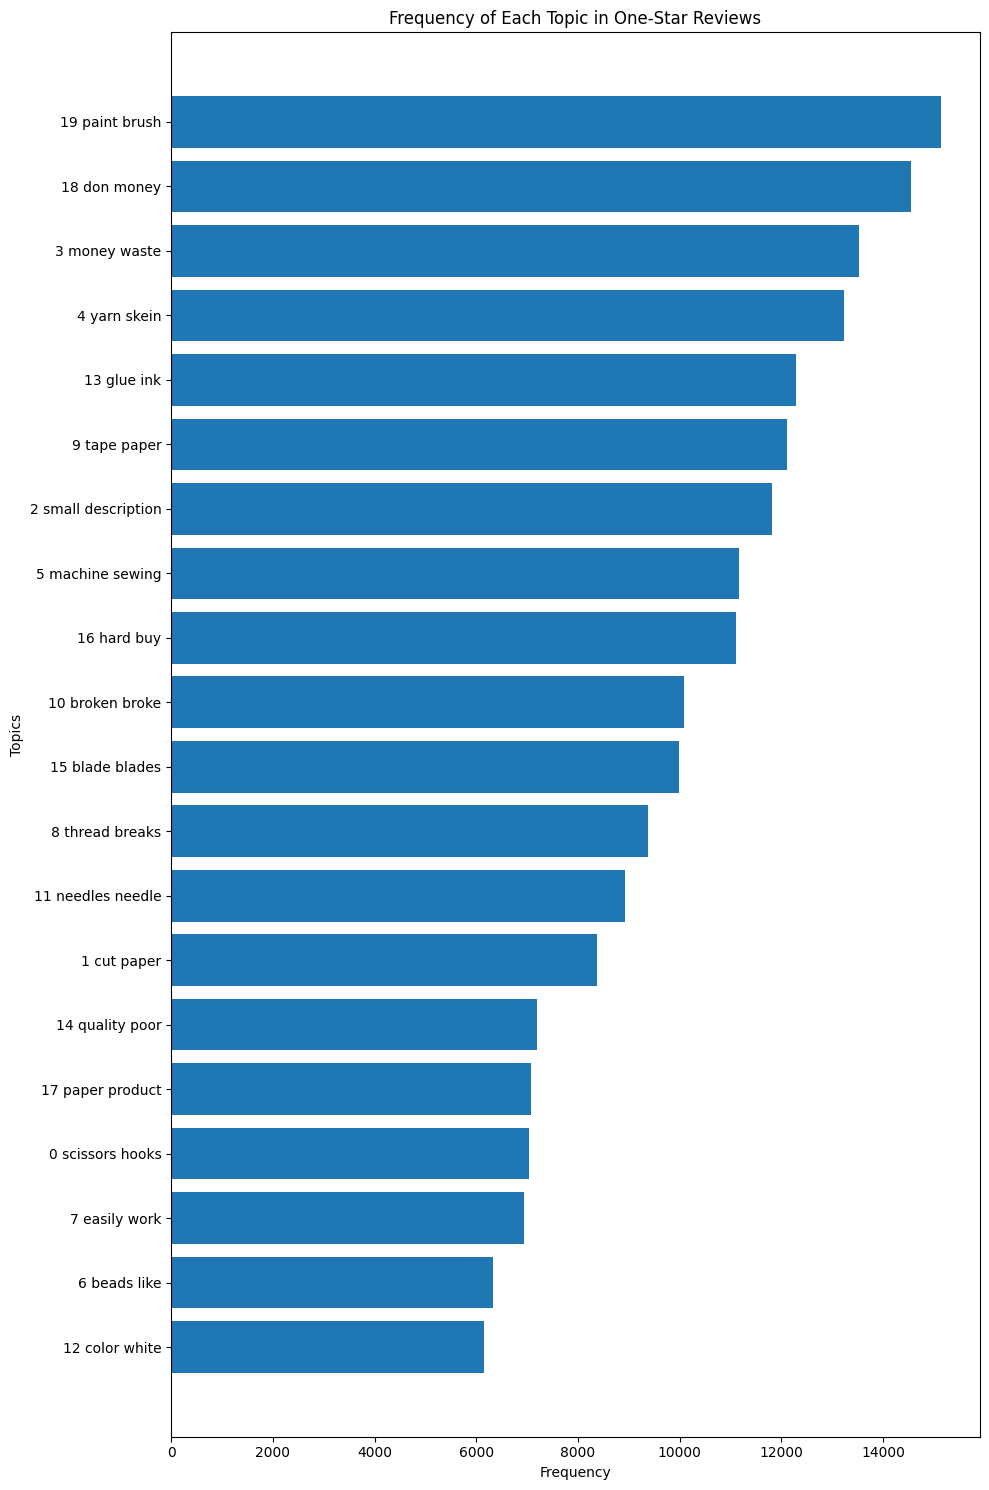

In [208]:
topic_word_distributions = lda_one_star.components_
# The number of topics
n_topics = lda_one_star.components_.shape[0]

# Sum across the columns to get the total counts for each topic
topic_frequencies = np.sum(topic_word_distributions, axis=1)

# Sort topics by frequency
sorted_topics = np.argsort(topic_frequencies)[::-1]

# Now we will create the labels for the topics with the top 2 words
topic_labels = []
for topic_idx in sorted_topics:
    top_words = [feature_names_one_star[i] for i in topic_word_distributions[topic_idx].argsort()[:-3:-1]]
    label = f'{topic_idx} ' + ' '.join(top_words)
    topic_labels.append(label)

# Plotting the bar chart
plt.figure(figsize=(10, 15))
plt.barh(range(n_topics), topic_frequencies[sorted_topics])
plt.yticks(range(n_topics), [topic_labels[topic_idx] for topic_idx in sorted_topics])
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.xlabel('Frequency')
plt.ylabel('Topics')
plt.title('Frequency of Each Topic in One-Star Reviews')
plt.tight_layout()
plt.show()

## **High-Rated Reviews**

**Sentiment Analysis over the top 20 topics**

In [209]:
# Analyze 5-star reviews
five_star_reviews = train[train['overall'] == 5]['Review']
five_star_topic_assignments, lda_five_star, feature_names_five_star, X, vectorizer = analyze_reviews(five_star_reviews, n_topics=20, n_top_words=10)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Topic 0: project fun make used worked wait little using cute year (Sentiment: NEGATIVE)
Topic 1: machine sewing thread embroidery foot brother quilting sew machines easy (Sentiment: NEGATIVE)
Topic 2: projects tool awesome work tools wire sizes jewelry different handy (Sentiment: POSITIVE)
Topic 3: cards card stamp stamps making make beautiful used set add (Sentiment: POSITIVE)
Topic 4: set pencils pencil case review colored coloring art like artist (Sentiment: POSITIVE)
Topic 5: yarn hooks crochet soft hook work knitting easy make knit (Sentiment: POSITIVE)
Topic 6: paper punch book pages sheets board size pad like perfect (Sentiment: POSITIVE)
Topic 7: cut cutting die cuts dies makes easy embossing easier make (Sentiment: NEGATIVE)
Topic 8: used make clay glass soap like just product mold dry (Sentiment: NEGATIVE)
Topic 9: perfect beads size gift loved bought loves small pretty daughter (Sentiment: POSITIVE)
Topic 10: colors color beautiful bright white black vibrant blue glitter gol

In [210]:
common_topics = find_common_topics(feature_names_one_star, lda_one_star, feature_names_five_star, lda_five_star, 10)

# Create a list to store the common topics
common_topics_list = []

# Add common topics to the list
for topic_pair in common_topics:
    common_topics_list.append((topic_pair[0], topic_pair[1], list(topic_pair[2])))

# Print the common topics list
print(common_topics_list)


[(0, 4, ['like']), (0, 5, ['hooks', 'hook']), (0, 6, ['like']), (0, 8, ['just', 'like']), (0, 11, ['just']), (0, 13, ['just', 'like']), (0, 14, ['like', 'scissors']), (0, 15, ['like']), (0, 18, ['just', 'time']), (1, 3, ['card']), (1, 6, ['punch', 'paper']), (1, 7, ['cutting', 'die', 'dies', 'cut']), (1, 8, ['just']), (1, 11, ['just']), (1, 13, ['just']), (1, 18, ['just']), (2, 6, ['size']), (2, 8, ['product']), (2, 9, ['small', 'size']), (2, 13, ['product']), (2, 17, ['product']), (2, 18, ['expected']), (2, 19, ['small', 'box']), (3, 2, ['work']), (3, 5, ['work']), (3, 8, ['just', 'product']), (3, 11, ['just', 'don', 'did']), (3, 13, ['just', 'product', 'does']), (3, 17, ['product']), (3, 18, ['just', 'time']), (4, 2, ['work']), (4, 5, ['work', 'yarn', 'soft']), (4, 8, ['clay']), (4, 9, ['bought']), (4, 11, ['bought']), (4, 15, ['really']), (5, 1, ['sewing', 'machine', 'brother', 'thread']), (5, 2, ['work']), (5, 5, ['work']), (5, 11, ['did']), (5, 14, ['needle']), (5, 19, ['fit', 'th

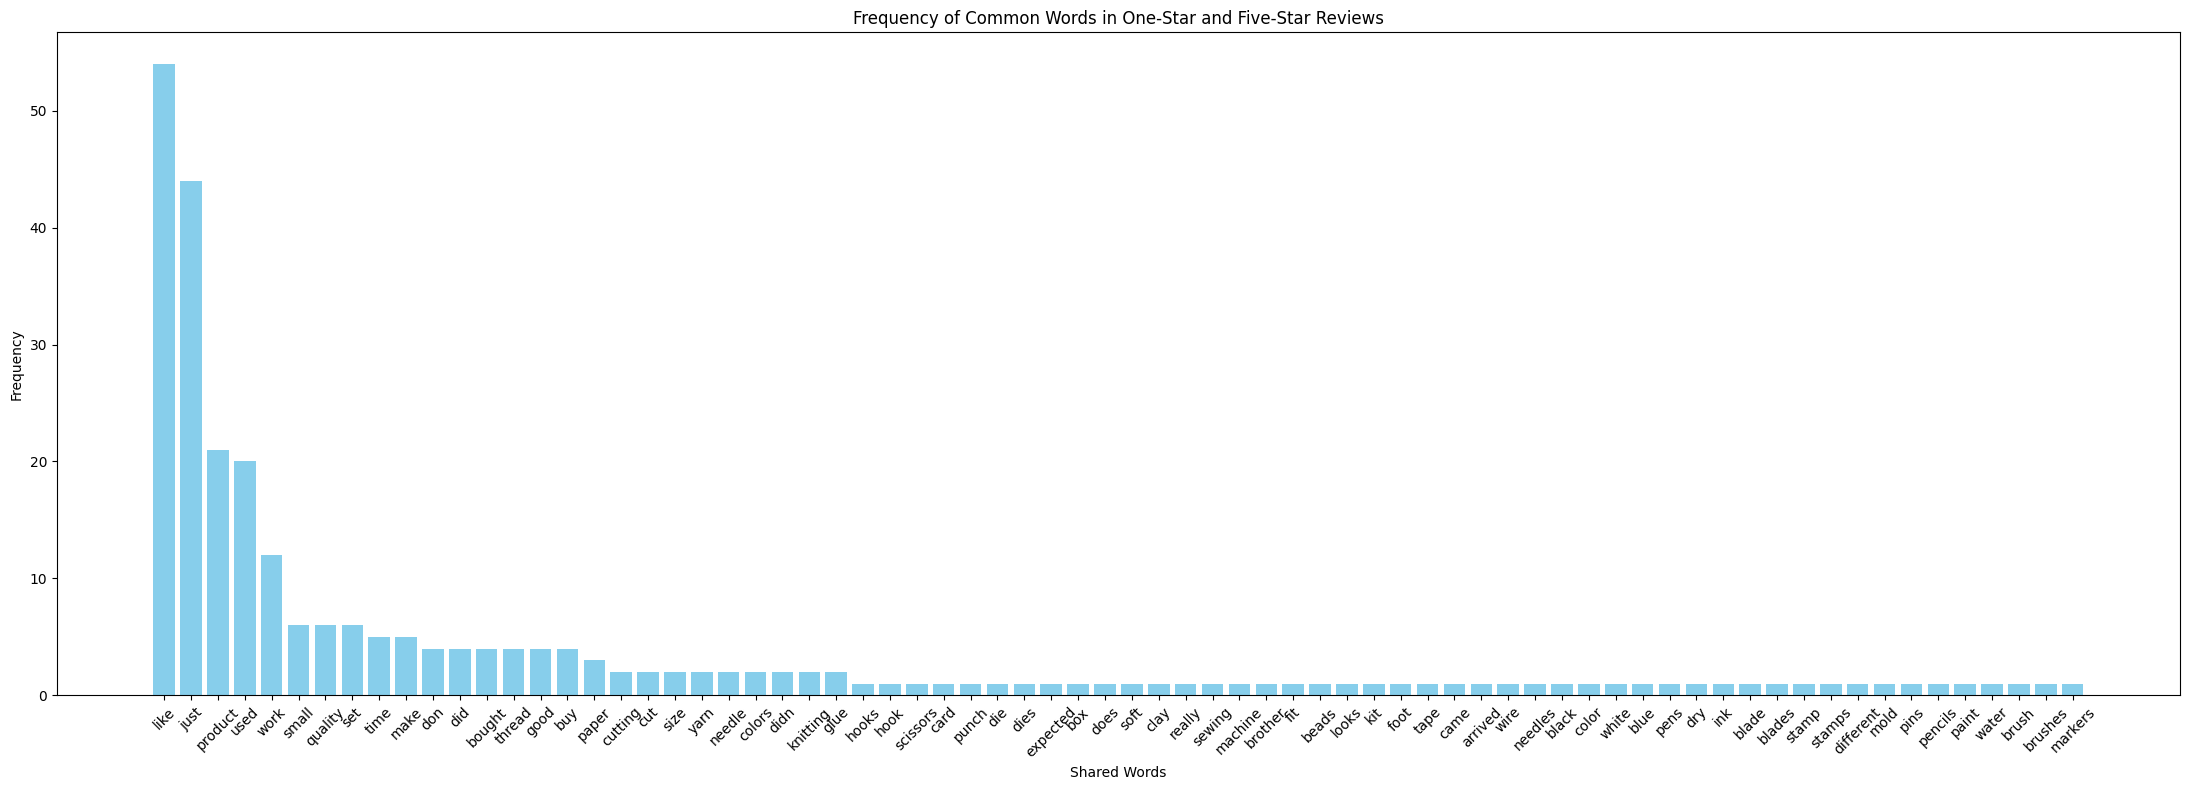

In [211]:
import matplotlib.pyplot as plt
import numpy as np

# Create a dictionary to store the frequency of each shared word
word_freq = {}
for topic_pair in common_topics_list:
    for word in topic_pair[2]:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

# Sort the dictionary by frequency
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))

# Plotting the bar chart
plt.figure(figsize=(22, 8))
plt.bar(sorted_word_freq.keys(), sorted_word_freq.values(), color='skyblue')
plt.xlabel('Shared Words')
plt.ylabel('Frequency')
plt.title('Frequency of Common Words in One-Star and Five-Star Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**5-Star Reviews with their topics**

In [212]:
# Create a DataFrame with the review text and their top 2 assigned topics
five_star_reviews_df = pd.DataFrame({'Review': five_star_reviews, 'Assigned_Topics': list(five_star_topic_assignments)})

# Display the DataFrame with the top 2 topics for each review
print("\nFive-Star Reviews with Assigned Topics:")
print(five_star_reviews_df)


Five-Star Reviews with Assigned Topics:
                                                   Review Assigned_Topics
0       i love these glitter pens. they sparkle deligh...         [6, 10]
1       it works well with my machine. i use mostly co...         [19, 1]
2       this is a great assortment of colors, though t...         [0, 10]
3                            just what i was looking for.         [0, 18]
4           i make 400 birds for the hospital each month.         [3, 11]
...                                                   ...             ...
274427  tiny enough to fit through the holes of seed b...         [14, 0]
274428  these are the perfect application bottles for ...        [13, 16]
274430  i love these dies they make great backgrounds ...          [7, 3]
274431  i love darice embossing folders. darcie's fold...         [18, 7]
274432  i ordered these to add to my earthy markers th...         [0, 10]

[202087 rows x 2 columns]


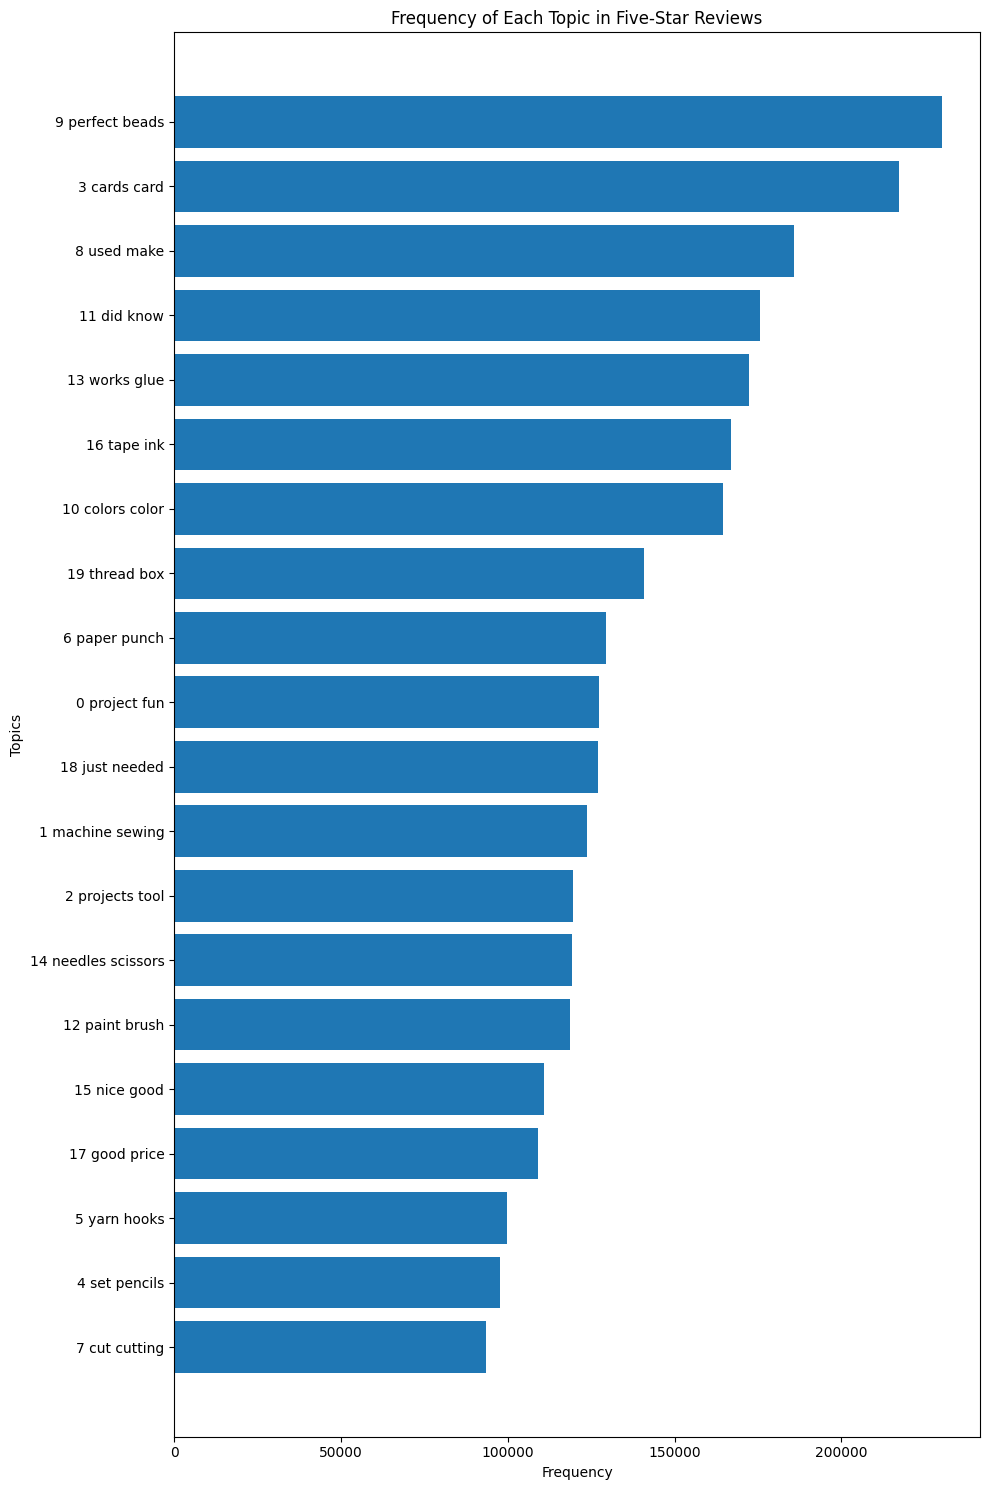

In [213]:
topic_word_distributions = lda_five_star.components_
# The number of topics
n_topics = lda_five_star.components_.shape[0]

# Sum across the columns to get the total counts for each topic
topic_frequencies = np.sum(topic_word_distributions, axis=1)

# Sort topics by frequency
sorted_topics = np.argsort(topic_frequencies)[::-1]

# Now we will create the labels for the topics with the top 2 words
topic_labels = []
for topic_idx in sorted_topics:
    top_words = [feature_names_five_star[i] for i in topic_word_distributions[topic_idx].argsort()[:-3:-1]]
    label = f'{topic_idx} ' + ' '.join(top_words)
    topic_labels.append(label)

# Plotting the bar chart
plt.figure(figsize=(10, 15))
plt.barh(range(n_topics), topic_frequencies[sorted_topics])
plt.yticks(range(n_topics), [topic_labels[topic_idx] for topic_idx in sorted_topics])
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.xlabel('Frequency')
plt.ylabel('Topics')
plt.title('Frequency of Each Topic in Five-Star Reviews')
plt.tight_layout()
plt.show()